# Event-data Representation and Visualization

The **goals** of this exercise are:
- to familiarize yourself with the data produced by an event-based camera
- to practice converting the event data into image-like (also called "grid-based" or "array-based") representations, which is a common practice of many algorithms (without judging whether it is "optimal" or not).
- to produce "pretty plots" (never underestimate the value of good figures on reports and papers).

For this exercise let us use data from the `slider_depth` sequence in the [Event Camera Dataset and Simulator (IJRR'17)](http://rpg.ifi.uzh.ch/davis_data.html). A small portion of this data is provided in the folder `/slider_depth`". The reasons to use this file are that it is available in simple txt format and that it is small (i.e., manageable).

The sequences in the above-mentioned dataset were recorded with a DAVIS240C camera (from iniVation) and they also contain grayscale frames, recorded at about 25 Hz (frames per second). The frames can be helpful to get a better idea of the scene. Once you are comfortable with the exercise, feel free to use other sequences or data from other publicly available [datasets](https://github.com/uzh-rpg/event-based_vision_resources/blob/master/README.md#datasets-sorted-by-topic).

This exercise is not as guided as the first one. Instead of filling in the blanks, here we show the plots and you are asked to write code to produce such plots (approximately). You may use tools such as numpy and matplotlib. If possible, try also to write it nicely, using resuable functions.

# Data format

Events in the txt files of the IJRR'17 dataset are given one per line. For example, the first ten lines of the slider_depth txt file are:

    0.003811000 96 133 0
    0.003820001 127 171 0
    0.003836000 4 160 0
    0.003837000 149 122 0
    0.003848001 63 121 1
    0.003849001 17 144 1
    0.003852000 92 119 0
    0.003866001 16 137 1
    0.003875000 156 71 0
    0.003879000 26 149 0

That is, data is given in the form:

    t, x, y, p

timestamp $t$ (in seconds), $x$ pixel coordinate (horizontal or column index), $y$ pixel coordinate (vertical coordinate or row index) and polarity $p$ (1 bit of information with the sign of the brightness change: 1 if positive, 0 if negative). Since the DAVIS240C has a spatial resolution of 240 x 180 pixels, $x$ and $y$ adopt values in $\{0,\ldots,239\}$ and $\{0,\ldots,179\}$, respectively.

You first task is to read the data from file (loading it into temporal variables).

In [ ]:
!git clone https://github.com/tub-rip/events_viz/
!wget https://rpg.ifi.uzh.ch/datasets/davis/simulation_3walls.zip
!unzip -o /content/simulation_3walls.zip events.txt -d /content/events_viz/slider_depth/

from google.colab import drive
drive.mount('/content/drive')


Cloning into 'events_viz'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 84 (delta 19), reused 72 (delta 11), pack-reused 0
Receiving objects: 100% (84/84), 8.60 MiB | 27.96 MiB/s, done.
Resolving deltas: 100% (19/19), done.
--2024-05-06 03:12:57--  https://rpg.ifi.uzh.ch/datasets/davis/simulation_3walls.zip
Resolving rpg.ifi.uzh.ch (rpg.ifi.uzh.ch)... 130.60.183.133
Connecting to rpg.ifi.uzh.ch (rpg.ifi.uzh.ch)|130.60.183.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://download.ifi.uzh.ch/rpg/web/datasets/davis/simulation_3walls.zip [following]
--2024-05-06 03:12:58--  https://download.ifi.uzh.ch/rpg/web/datasets/davis/simulation_3walls.zip
Resolving download.ifi.uzh.ch (download.ifi.uzh.ch)... 130.60.61.200
Connecting to download.ifi.uzh.ch (download.ifi.uzh.ch)|130.60.61.200|:443... connected.
HTTP request sent, awaiting respo

In [ ]:
!pip install colour-demosaicing
# !pip install raw2fits
!pip install bm4d
# !pip install pybm3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt

Here is some code to read the data in a txt file with the format shown above

In [ ]:
# Simple codre. There may be more efficient ways.
def extract_data(filename):
    infile = open(filename, 'r')
    timestamp = []
    x = []
    y = []
    pol = []
    for line in infile:
        words = line.split()
        timestamp.append(float(words[0]))
        x.append(int(words[1]))
        y.append(int(words[2]))
        pol.append(int(words[3]))
    infile.close()
    return timestamp,x,y,pol

In [ ]:
filename_sub = '/content/events_viz/slider_depth/events_chunk.txt'
# filename_sub = '/content/events_viz/slider_depth/events.txt'

num_events = 10000
# Call the function to read data
timestamp, x, y, pol = extract_data(filename_sub)

print(len(timestamp), np.max(timestamp), timestamp)
print(len(x), np.max(x), x)
print(len(y), np.max(y), y)
print(len(pol), pol)

50000 0.174156 [0.003811, 0.003820001, 0.003836, 0.003837, 0.003848001, 0.003849001, 0.003852, 0.003866001, 0.003875, 0.003879, 0.003881, 0.003897, 0.003904, 0.003905, 0.003909001, 0.003917, 0.003923, 0.003926, 0.003927, 0.003933001, 0.003934001, 0.003935001, 0.003939001, 0.00394, 0.003958001, 0.003962001, 0.003967, 0.003971, 0.004003001, 0.004003001, 0.004009, 0.004039, 0.004043001, 0.004047001, 0.004048001, 0.004058, 0.004059, 0.004072001, 0.004073001, 0.004077, 0.004078, 0.004083, 0.004099, 0.004101, 0.004107, 0.004113001, 0.004121, 0.004137001, 0.004142001, 0.004147, 0.00415, 0.004151, 0.004157001, 0.004163001, 0.004169, 0.004171, 0.004173, 0.004182001, 0.004187001, 0.004193, 0.004193, 0.004193, 0.004194, 0.004194, 0.004199001, 0.004215, 0.004224001, 0.004234, 0.004237, 0.004238, 0.004238, 0.004255, 0.004258, 0.004275001, 0.00428, 0.00428, 0.004282, 0.004284, 0.004293001, 0.004294001, 0.004296001, 0.004298001, 0.004302, 0.004313001, 0.004321001, 0.004321001, 0.004325, 0.004337001, 

3009638 1000 [   0    0    0 ..., 1000 1000 1000]
3009638 315 [122 122 121 ..., 171 171 172]
3009638 256 [ 54  54  55 ..., 248 248 248]
3009638 [-1 -1 -1 ...,  1  1  1]
200000
3009638 1141313
200000 58 0
200000 0.13116075 0.0


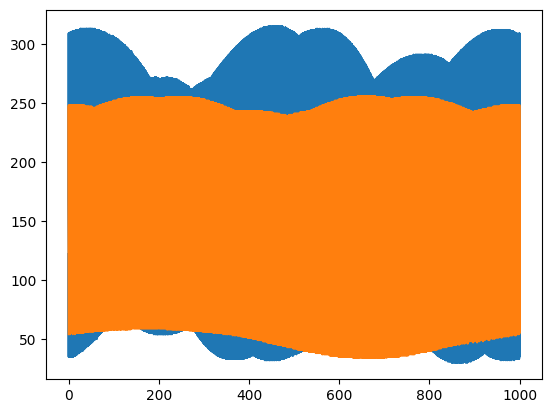

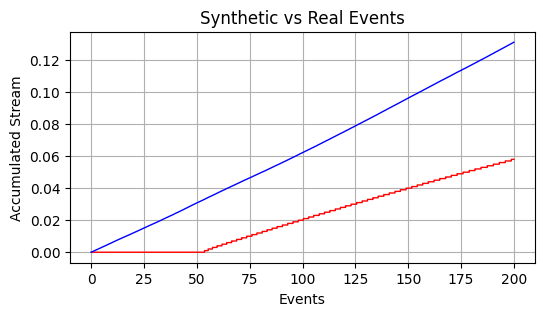

j: 53644
k: 1714


In [ ]:
filename_sub = '/content/drive/MyDrive/Project/2024 Spring/CMSC848B/events.npz'                          # Drum
# filename_sub = '/content/worgb-2022_11_16_15_53_25.npz'       #
# filename_sub = '/content/drive/MyDrive/Project/2024 Spring/CMSC848B/b10_cal1_45rpm_gfox_eonly-2022_05_12_01_17_04_shift_ts1.npz'   # sewing
filename_sub_1 = '/content/drive/MyDrive/Project/2024 Spring/CMSC848B/b10_cal1_45rpm_gfox_eonly-2022_05_12_01_17_04_shift_ts1.npz'   # sewing

# filename_sub = '/content/b10_cal1_45rpm_gfox_eonly-2022_05_12_00_53_10_shift_ts1.npz' # chick
event_data = np.load(filename_sub)
event_data_1 = np.load(filename_sub_1)
# xs, ys, ts, ps = event_data['x'], event_data['y'], event_data['t'], event_data['p']
timestamp, x, y, pol = event_data['t'], event_data['x'], event_data['y'], event_data['p']
timestamp_1, _, _, _ = event_data_1['t'], event_data_1['x'], event_data_1['y'], event_data_1['p']

print(len(timestamp), np.max(timestamp), timestamp)
print(len(x), np.max(x), x)
print(len(y), np.max(y), y)
print(len(pol), pol)
plt.plot(timestamp, x)
plt.plot(timestamp, y)

# Generate time steps
# time_steps = np.unique(txyp[:,0])
time_clip = 200000
time_steps = timestamp[:time_clip]
time_steps_1 = timestamp_1[:time_clip]

xx = np.linspace(1,time_clip,time_clip)
print(len(xx))
print(len(timestamp),len(timestamp_1))

print(len(time_steps),max(time_steps),min(time_steps))
print(len(time_steps_1),max(time_steps_1),min(time_steps_1))

# Plot staircase plot
plt.figure(figsize=(6, 3))
# plt.plot((x/1000)[17500:], (time_steps/1000)[17500:], drawstyle='steps-post', linewidth=1,color='r')
# plt.plot((x/1000)[17500:], time_steps_1[17500:], drawstyle='steps-post', linewidth=1,color='b')
start = 0
# start = 107500
dt = 800000
plt.plot((xx/1000)[start: start+dt], (time_steps/1000)[start:start+dt], drawstyle='steps-post', linewidth=1,color='r')
plt.plot((xx/1000)[start: start+dt], time_steps_1[start:start+dt], drawstyle='steps-post', linewidth=1,color='b')

plt.xlabel('Events')
plt.ylabel('Accumulated Stream')
plt.title('Synthetic vs Real Events')
plt.grid(True)
plt.show()

# for i in range(1000):
#     print(timestamp[i], x[i], y[i], pol[i])

for j in range(107500):
    if timestamp[j]>0:
        print('j:',j)
        break
for k in range(53644,107500):
    if timestamp[k]>1:
        print('k:',k-j)
        break

For this exercise, let us provide the sensor size (height, width)

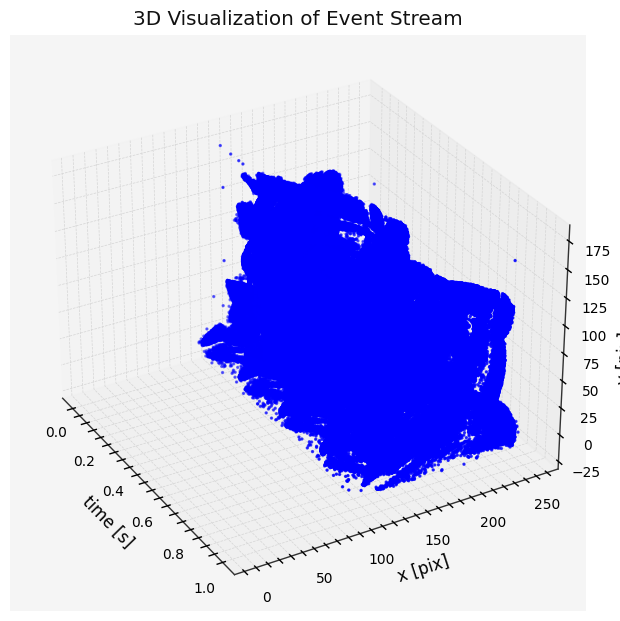

In [ ]:
# img_size = (180,240)
img_size = (260, 346)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# frame extraction
clip_start = 0
# clip_end = 5000 - 1
clip_end = 53644 - 1

num_events = clip_end - clip_start + 1

# Assuming you have the data in numpy arrays

# Create a 3D figure
fig = plt.figure()  # Adjust the figure size as needed
ax = fig.add_subplot(projection='3d')
ax.set_position([0.1, 0.1, 0.8, 0.8])

# Plot the data points with different colors based on pol
red_indices = np.where(pol == 0)[0]
blue_indices = np.where(pol == 1)[0]

ax.scatter(timestamp[red_indices], x[red_indices], 179-y[red_indices], s=2, c='r')
ax.scatter(timestamp[blue_indices], x[blue_indices], 179-y[blue_indices], s=2, c='b')

# Set the viewpoint
azim = -30  # Azimuth angle in degrees
elev = 30  # Elevation angle in degrees
ax.view_init(elev=elev, azim=azim)

# Add labels and title
ax.set_xlabel('time [s]')
ax.set_ylabel('x [pix]')
ax.set_zlabel('y [pix]')
plt.title('3D Visualization of Event Stream')

# Show the plot
plt.show()


# Space-time plot

The following figure shows a visualization of (the first 2000) events in space-time (image plane of the camera amd time).

![Events, space-time and polarity](/content/events_viz/images/space_time_pol.png)

Let us first try to plot something simpler (with fewer dimensions).
The following plots were generated with events between $N_e=5000$ and $N_e = 50000$.


# Image-like (2D grid) representation

## Histograms of events (Event count)
You are asked to write Python code to create the following image. It has been generated by accumulating the event polarities pixel-wise from the first $N_e=5000$ in the file.

![balance_polarities_gray](/content/events_viz/images/balance_polarities_gray.png)

Loaded npz
1 -1
Brightness incremet image: numevents =  53644
[[ 2.194688  2.194688  2.194688  2.194688  2.194688]
 [ 2.194688  2.194688  2.194688  2.194688  2.194688]
 [ 2.194688  2.194688  2.194688  2.194688  2.194688]
 [ 2.194688  2.194688  2.194688  2.194688  2.194688]
 [ 2.194688  2.194688  2.194688  2.194688  2.194688]]
before: 2.19469 2.19469
[[ 2.194688  2.194688]
 [ 2.194688  2.194688]]
[[[ 2.194688  2.194688  2.194688]
  [ 2.194688  2.194688  2.194688]]

 [[ 2.194688  2.194688  2.194688]
  [ 2.194688  2.194688  2.194688]]]
1. Before: 4.19469 -4.80531 (260, 346, 3)
[[[198 198 198]
  [198 198 198]]

 [[198 198 198]
  [198 198 198]]]
[[[255   1   1]
  [  1 255   1]]

 [[  1 255   1]
  [  1   1 255]]]
2. After: 255 1 (260, 346, 3)
Grayscale 255 0
Grayscale 255 0


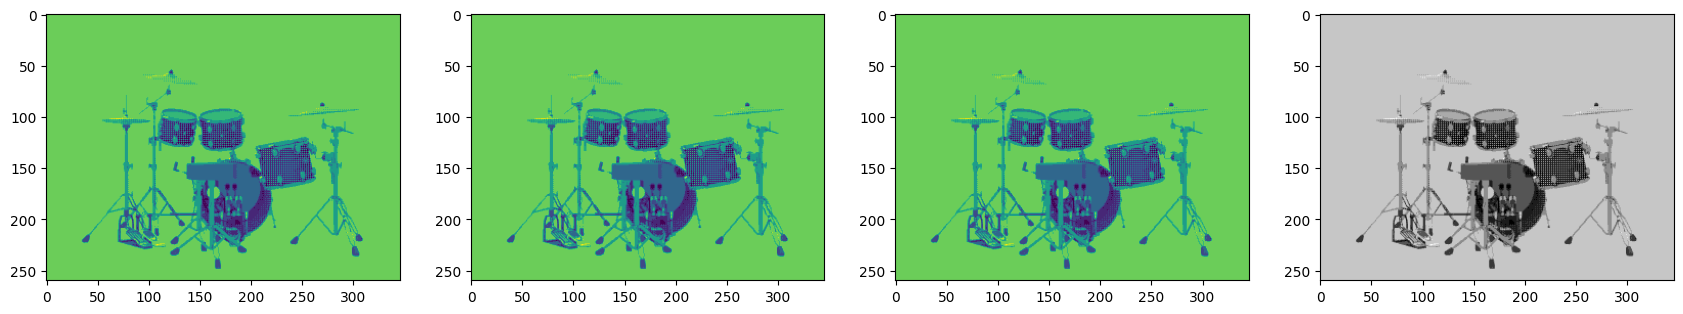

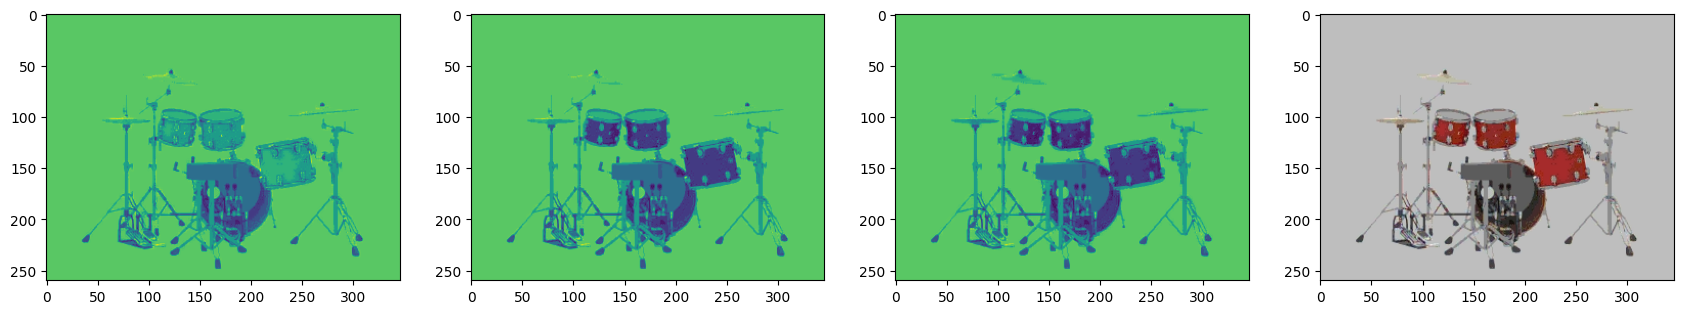

(260, 346, 3)
255 0


In [ ]:
# For this exercise, we just provide the sensor size (height, width)
import cv2
import imageio
import bm4d
import os

import colour

from colour_demosaicing import (
    ROOT_RESOURCES_EXAMPLES,
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)


def get_file_type(file_path):
    root, ext = os.path.splitext(file_path)
    return ext

def scale_img(array):
    min_val = np.min(array)
    max_val = np.max(array)
    sf = 255 / (max_val - min_val)
    scaled_array = ((array - min_val) * sf).astype(np.uint8)
    return scaled_array

if get_file_type(filename_sub)==".txt":
    print("Loaded txt")
    img_size = (180, 240)
    timestamp, x, y, pol = extract_data(filename_sub)
    bayer = np.zeros(img_size, np.uint8)

elif get_file_type(filename_sub)==".npz":
    print("Loaded npz")
    img_size = (260, 346)
    timestamp, x, y, pol = event_data['t'], event_data['x'], event_data['y'], event_data['p']
    bayer = np.zeros(img_size, np.uint8)

print(np.max(pol), np.min(pol))

# %% Brightness incremet image (Balance of event polarities)

# num_events = 2000
# num_events = 200000
# num_events = 100000
# num_events = 500000
# num_events = len(timestamp)

# num_events = 3009638//4
# num_events = 5
# num_events = 1714

num_events = 53644
debayer = False
is_colored = True

print("Brightness incremet image: numevents = ", num_events)

# Compute image by accumulating polarities.

img = np.zeros(img_size, np.int8)
# img_rgb = np.zeros(img_size + (3,), dtype=np.float32)
# img_rgb = np.zeros(img_size + (3,), dtype=np.float32) + np.log(125) / 2.2
img = np.zeros(img_size , dtype=np.float32) + np.log(125) / 2.2
# img = np.random.randint(0, 256, size=img_size ).astype(np.float32) + np.log(125) / 2.2

print(img[:5,:5])

print("before:", np.max(img), np.min(img))
t_ref = timestamp[0] # time of the last event in the packet
tau = 0.03 # decay parameter (in seconds)
dt = num_events*10

for i in range(num_events):
# for i in range(len(timestamp)):

# for i in range(num_events+dt, 2*num_events+dt):
# for i in range(num_events-300000, num_events-200000):
# for i in range(num_events-220000, num_events-200000):

    # Need to convert the polarity bit from {0,1} to {-1,+1} and accumulate
    # img[y[i],x[i]] += (2*pol[i]-1)
    # img[y[i], x[i]] = 0
    img[y[i], x[i]] += pol[i]

    # # Positive
    # if (pol[i] > 0):
    #     img[y[i],x[i]] += pol[i] # count events

    # # Time surface (exp decay). Both polarities
    # img[y[i],x[i]] = np.exp(-(t_ref-timestamp[i]) / tau)

    # Time surface (exp decay). Both polarities
    # if (pol[i] > 0):
    #     img[y[i],x[i]] += np.exp(-(t_ref-timestamp[i]) / tau)
    # else:
    #     img[y[i],x[i]] -= np.exp(-(t_ref-timestamp[i]) / tau)

    # if (pol[i] > 0):
    #     img[y[i],x[i]] = np.exp(-(t_ref-timestamp[i]) / tau)
    # else:
    #     img[y[i],x[i]] = np.exp(-(t_ref-timestamp[i]) / tau)

    # if (pol[i] > 0):
    #     img[y[i],x[i]] += np.exp(-(t_ref-timestamp[i]) / tau)
    # else:
    #     img[y[i],x[i]] -= np.exp(-(t_ref-timestamp[i]) / tau)

bg_mask =  img ==  np.log(125) / 2.2
print(img[:2,:2])

img = np.tile(img[..., None], (1, 1, 3))
# img = np.tile(img[..., None], (1, 1, 3)) + np.log(159) / 2.2

print(img[:2,:2])

print("1. Before:", np.max(img), np.min(img), img.shape)


bayer = scale_img(img)

# Apply mask
bayer[bg_mask] = 198

print(bayer[:2,:2])


img_gray = bayer

F = np.array([[[1, 0, 0], [0, 1, 0]], [[0, 1, 0], [0, 0, 1]]])
F = np.tile(F, (int(img_size[0]/2), int(img_size[1]/2), 1))

bayer = F * img_gray
bayer = np.clip(np.exp(bayer * 2.2), 0, 255).astype(np.uint8)
# bayer = scale_img(bayer)


print(bayer[:2,:2])

print("2. After:", np.max(bayer), np.min(bayer), bayer.shape)

# bayer = np.clip(np.exp(bayer * 2.2), 0, 255).astype(np.uint8)
maxabsval = np.amax(np.abs(bayer))

fig = plt.figure(figsize=(21,6))

plt.subplot(1,4,1)
plt.imshow(img_gray[:,:,0], clim=(0, 255))
plt.subplot(1,4,2)
plt.imshow(img_gray[:,:,1], clim=(0, 255))
plt.subplot(1,4,3)
plt.imshow(img_gray[:,:,2], clim=(0, 255))
plt.subplot(1,4,4)
plt.imshow(img_gray, clim=(0, 255))

print("Grayscale", np.max(img_gray), np.min(img_gray))
fig = plt.figure(figsize=(21,6))

# plt.subplot(1,4,1)
# plt.imshow(bayer[:,:,0], clim=(0, 255))
# plt.subplot(1,4,2)
# plt.imshow(bayer[:,:,1], clim=(0, 255))
# plt.subplot(1,4,3)
# plt.imshow(bayer[:,:,2], clim=(0, 255))

# mosaic
CFA = mosaicing_CFA_Bayer(img_gray)

# Menon2007
# bayer = demosaicing_CFA_Bayer_bilinear(CFA)
# bayer = demosaicing_CFA_Bayer_Malvar2004(CFA)
bayer = demosaicing_CFA_Bayer_Menon2007(CFA)
bayer = scale_img(bayer)

# sigma  = 10
# bayer = bm4d.bm4d(bayer, sigma); # white noise: include noise std
# bayer = scale_img(bayer)

print("Grayscale",np.max(bayer),np.min(bayer))

plt.subplot(1,4,1)
plt.imshow(bayer[:,:,0], clim=(0, 255))
plt.subplot(1,4,2)
plt.imshow(bayer[:,:,1], clim=(0, 255))
plt.subplot(1,4,3)
plt.imshow(bayer[:,:,2], clim=(0, 255))
plt.subplot(1,4,4)
plt.imshow(bayer, clim=(0, 255))

# plt.colorbar()
plt.show()
print(bayer.shape)
print(np.max(bayer),np.min(bayer))

# Save the image to a PNG file
imageio.imwrite('/content/Menon2007.png', bayer)


(2, 2, 3)
(10, 10, 3)


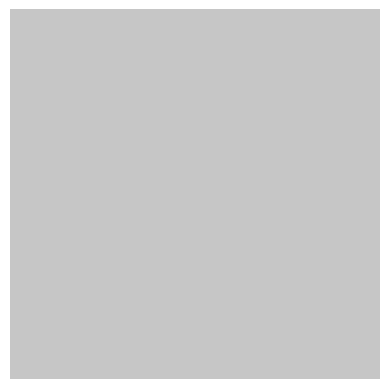

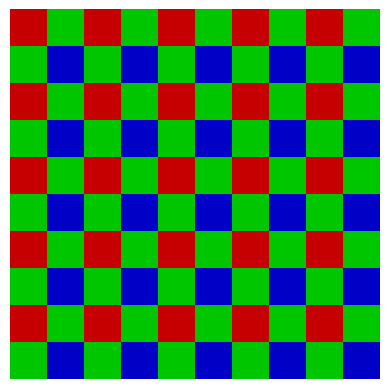

In [ ]:
F = np.array([[[1, 0, 0], [0, 1, 0]], [[0, 1, 0], [0, 0, 1]]])

# print(img_size[0]/2)
print(F.shape)
temp_size = (10, 10)

F_tile = np.tile(F, (int(temp_size[0]/2), int(temp_size[1]/2), 1))
print(F_tile.shape)
# print(F[:10,:10])


# Define the dimensions of the grayscale image
width = 100
height = 100

# Create a single-channel grayscale image with random intensity values
# gray_image = np.random.randint(0, 256, size=(height, width)).astype(np.uint8)
gray_image = np.ones(temp_size + (3,), dtype=int) * 198

# Display the grayscale image
plt.imshow(gray_image, cmap='gray', clim=(0, 255))
plt.axis('off')
plt.show()

out = F_tile * gray_image

# Display the grayscale image
plt.imshow(out, cmap='gray', clim=(0, 255))
plt.axis('off')
plt.show()


- What do the "three colors" in the image represent?
- What is the maximum number of positive events at any pixel?
- and the maximum number of negative events at any pixel?
- What could such an image be used for?

In [ ]:
# Write your answers...

Next, consider using [pseudocolor](https://en.wikipedia.org/wiki/False_color) to display the events. Write code to generate the following image.

![balance_polarities_red_blue](images/balance_polarities_red_blue.png)

- What do the white, red and blue colored pixels represent?
- Why is blue color used instead of green color?

Brightness incremet image: numevents =  200000


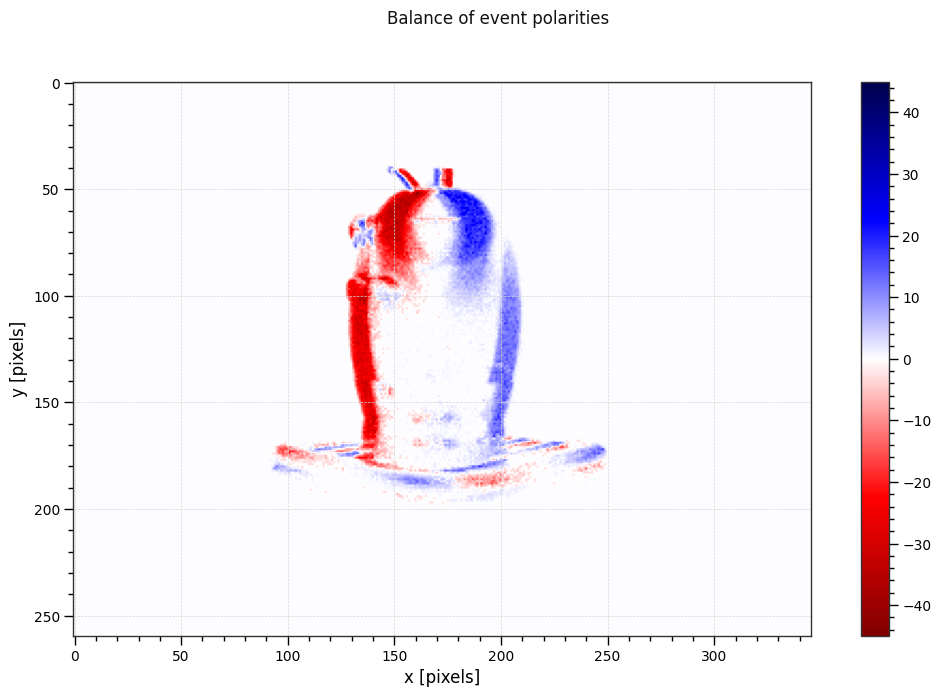

In [ ]:
# For this exercise, we just provide the sensor size (height, width)
# img_size = (180,240)
img_size = (260, 346)

# filename_sub = filename_sub
# # Call the function to read data
# timestamp, x, y, pol = extract_data(filename_sub)
timestamp, x, y, pol = event_data['t'], event_data['x'], event_data['y'], event_data['p']

# %% Brightness incremet image (Balance of event polarities)
num_events = num_events  # Number of events used
print("Brightness incremet image: numevents = ", num_events)

# Compute image by accumulating polarities.
img = np.zeros(img_size, np.int8)
for i in range(150000,num_events):
# for i in range(num_events):
    # Need to convert the polarity bit from {0,1} to {-1,+1} and accumulate
    img[y[i],x[i]] += (2*pol[i]-1)

# Same plot as above, but changing the color map
fig = plt.figure()
fig.suptitle('Balance of event polarities')
maxabsval = np.amax(np.abs(img))

plt.imshow(img, cmap='seismic_r', clim=(-maxabsval,maxabsval))
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()


Please write code to plot an image where every pixel may have only three possible values (ternary image): -1, 0, 1. You may set every pixel using, for example, the last event polarity at that pixel.

![ternary_gray](images/ternary_gray.png)

- What could this type of representation be good for compared to the histogram one (above)?



Brightness incremet image: numevents =  200000
1
-3


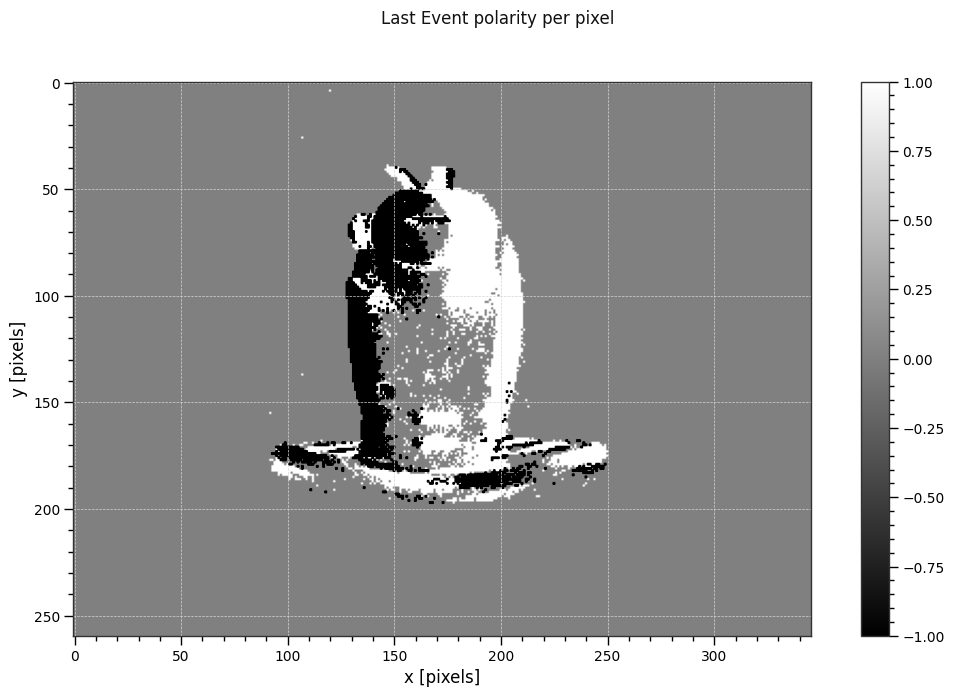

In [ ]:
# For this exercise, we just provide the sensor size (height, width)
# img_size = (180,240)
img_size = (260, 346)

# filename_sub = filename_sub
# # Call the function to read data
# timestamp, x, y, pol = extract_data(filename_sub)
timestamp, x, y, pol = event_data['t'], event_data['x'], event_data['y'], event_data['p']

# %% Brightness incremet image (Balance of event polarities)
num_events = num_events  # Number of events used
print("Brightness incremet image: numevents = ", num_events)

# Compute image by accumulating polarities.
img = np.zeros(img_size, np.int8)
for i in range(150000,num_events):
    # Need to convert the polarity bit from {0,1} to {-1,+1} and accumulate
    img[y[i],x[i]] = (2*pol[i]-1)  # no accumulation; overwrite the stored value

# Display the image in grayscale
fig = plt.figure()
fig.suptitle('Last Event polarity per pixel')
# img = np.clip(img,-1,1)
plt.imshow(img, cmap='gray', clim=(-1,1))
print(np.max(img))
print(np.min(img))

plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()


Next, you are asked to split by polarity, that is, to compute and plot one histogram of events for each event polarity. One for positive events and one for negative events, as shown next.

![](images/hist2d_pos_veridi.png)
![](images/hist2d_neg_veridi.png)

- Can you clearly identify both polarities in the moving edges?

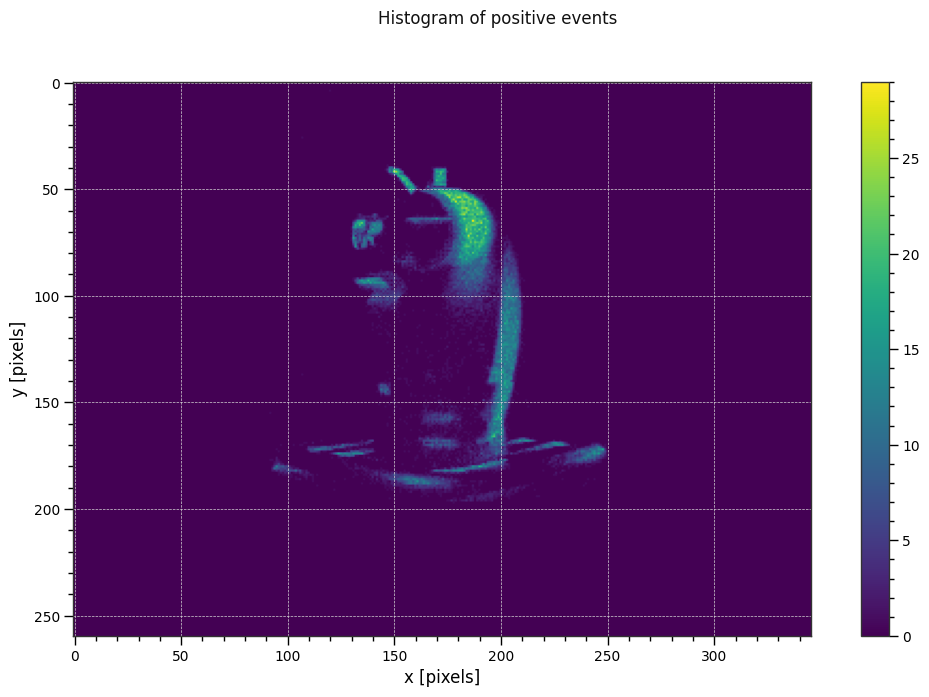

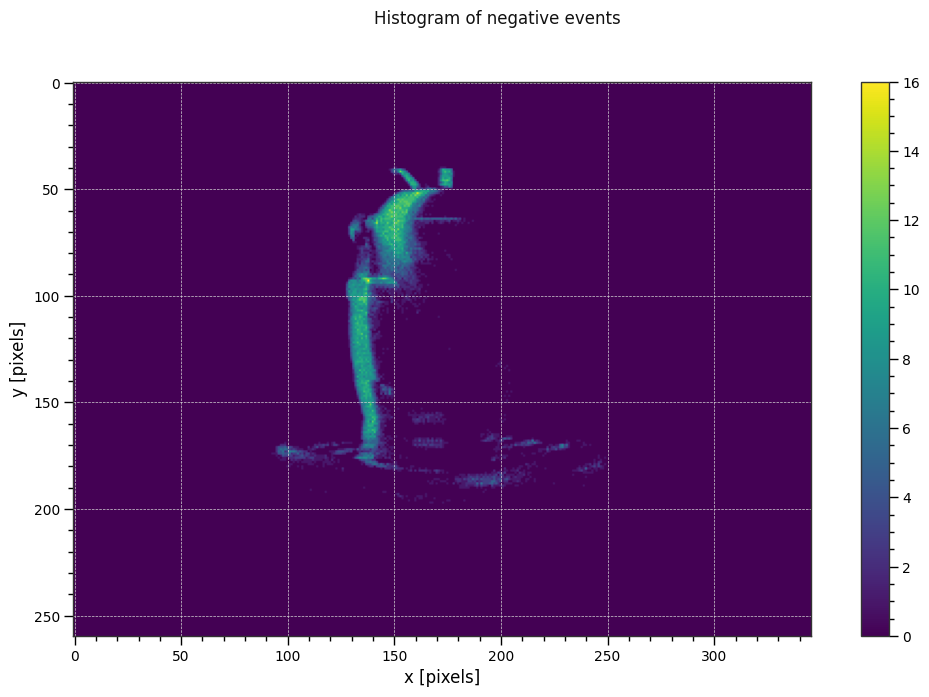

In [ ]:
# %% 2D Histograms of events, split by polarity (positive and negative events in separate images)
img_pos = np.zeros(img_size, np.int8)
img_neg = np.zeros(img_size, np.int8)
for i in range(150000,num_events):
    if (pol[i] > 0):
        img_pos[y[i],x[i]] += 1 # count events
    else:
        img_neg[y[i],x[i]] += 1

fig = plt.figure()
fig.suptitle('Histogram of positive events')
plt.imshow(img_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Histogram of negative events')
plt.imshow(img_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()


## Images of timestamps

Other useful representations are those that, instead of counting events at every pixel, just show a timestamp per pixel. It could be the last timestamp, an average timestamp or a timestamp composed with an exponential decay.
They are also called "time surfaces", "time maps" or "surface of active events".

### Time maps with exponential decay

Next, write code to replicate the type of time-images of the [2015 PAMI paper HOTS, Fig. 2](https://www.neuromorphic-vision.com/public/publications/1/publication.pdf).
Use 50000 events to better see the traces of the edges as they trigger events when they move through the image plane.

$ image(x,y; t) = exp(-|t-T(x,y)| / \tau) $

This is equation (3) in the above paper. The paper uses $\tau = 50$ ms (see the bottom of page 8). For the plots below, a value $\tau = 30$ ms is used. $\tau$ is a tunable parameter that depends on the motion in the scene.
Note that the paper uses a neighborhood ("context") of size $(2R+1)\times (2R+1)$ centered at the last event. Instead, you are aked to visualize the time surface using all image pixels (not a subset of them).

Also note that the paper uses the polarity $p$ as an argument of the time map $T$, while here it is not explicitly written. The following figure shows both polarities on the same time map, which is not easy to write with such a notation.

![](images/ts_exp_pol.png)


Time surface: numevents =  1141313


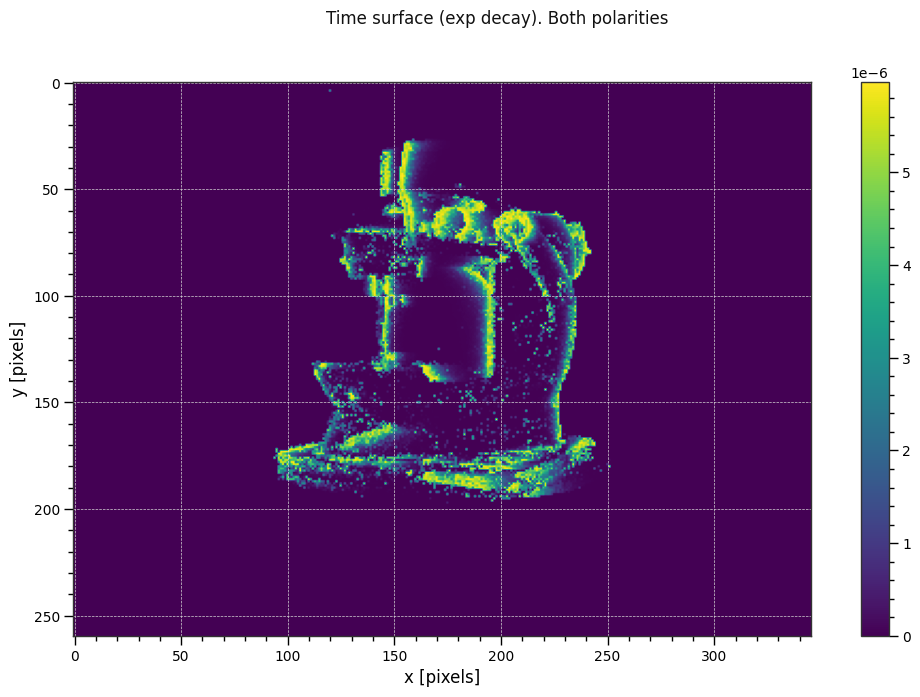

In [ ]:
# _____________________________________________________________________________
# %% Time surface (or time map, or SAE="Surface of Active Events")
num_events = len(timestamp)
print("Time surface: numevents = ", num_events)

img = np.zeros(img_size, np.float32)
t_ref = timestamp[-1] # time of the last event in the packet
# t_ref = timestamp[140000] # time of the last event in the packet

tau = 0.015 # decay parameter (in seconds)
# for i in range(num_events):
for i in range(num_events-300000, num_events-200000):

    img[y[i],x[i]] = np.exp(-(t_ref-timestamp[i]) / tau)

fig = plt.figure()
fig.suptitle('Time surface (exp decay). Both polarities')
plt.imshow(img)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()


Next, you are asked to split by polarity, creating one plot for each event polarity:

![](images/ts_exp_pos.png)
![](images/ts_exp_neg.png)

- Describe what you see in this representation and whether it is better or not to split by polarity. In what situations?
- Is there the same amount of noise on both type of events (positive, negative)?

<!-- ![](images/ts_exp_pol_red_blue.png)
![](images/ts_exp_balance_pol_red_blue.png) -->

1141313


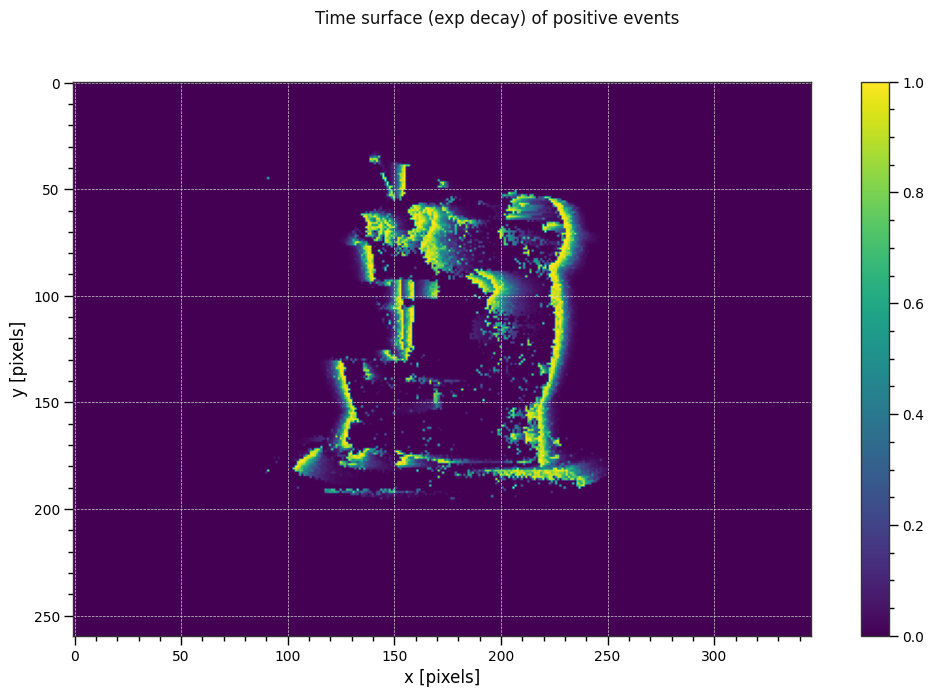

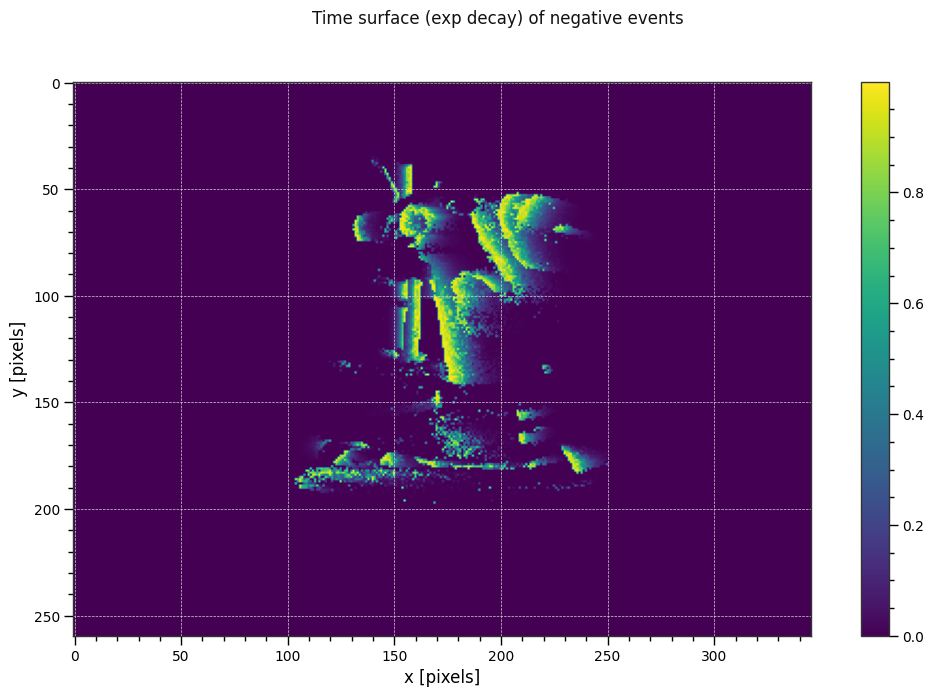

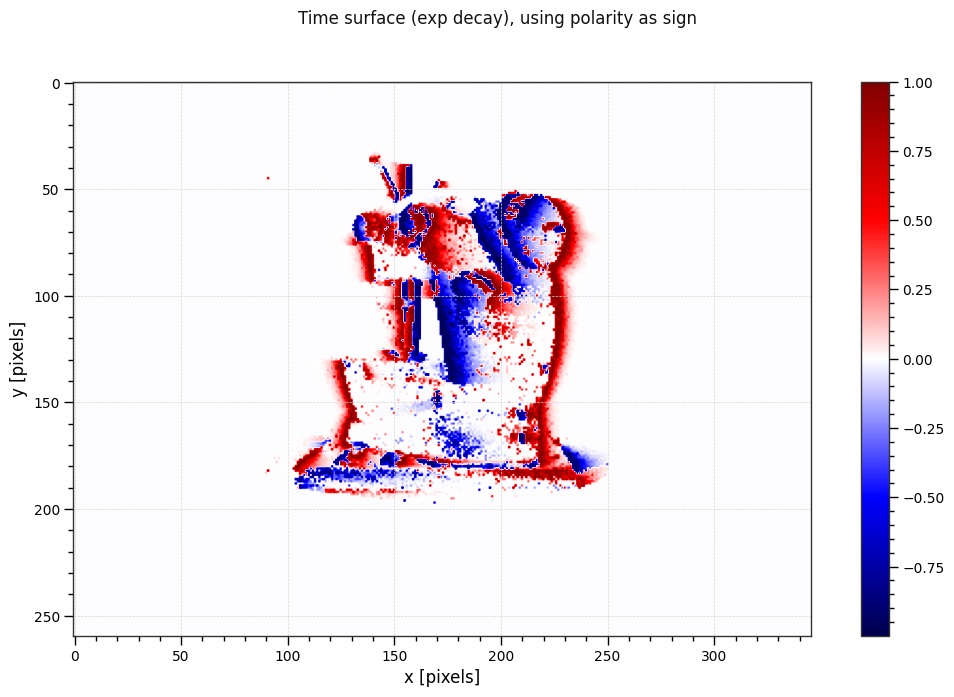

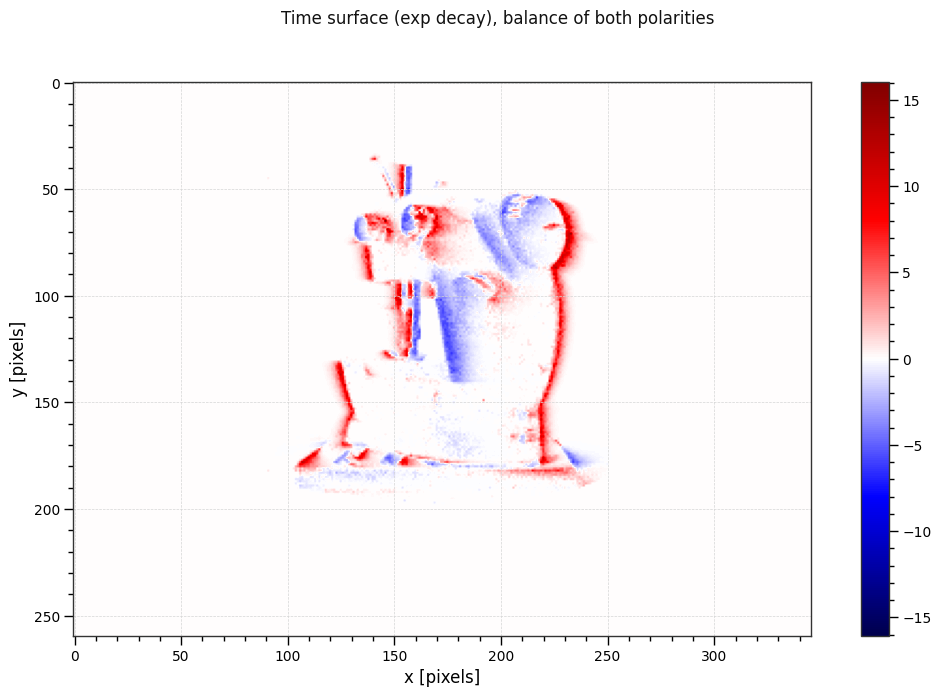

In [ ]:
# %% Time surface (or time map, or SAE), separated by polarity
sae_pos = np.zeros(img_size, np.float32)
sae_neg = np.zeros(img_size, np.float32)
# for i in range(150000,num_events):
print(num_events)
for i in range(num_events):

    if (pol[i] > 0):
        sae_pos[y[i],x[i]] = np.exp(-(t_ref-timestamp[i]) / tau)
    else:
        sae_neg[y[i],x[i]] = np.exp(-(t_ref-timestamp[i]) / tau)

fig = plt.figure()
fig.suptitle('Time surface (exp decay) of positive events')
plt.imshow(sae_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Time surface (exp decay) of negative events')
plt.imshow(sae_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()


# %% Time surface (or time map, or SAE), using polarity as sign of the time map
sae = np.zeros(img_size, np.float32)
# for i in range(150000,num_events):
for i in range(num_events):

    if (pol[i] > 0):
        sae[y[i],x[i]] = np.exp(-(t_ref-timestamp[i]) / tau)
    else:
        sae[y[i],x[i]] = -np.exp(-(t_ref-timestamp[i]) / tau)

fig = plt.figure()
fig.suptitle('Time surface (exp decay), using polarity as sign')
plt.imshow(sae, cmap='seismic') # using color (Red/blue)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

# %% "Balance of time surfaces"
# Accumulate exponential decays using polarity as sign of the time map
sae = np.zeros(img_size, np.float32)
# for i in range(150000,num_events):
for i in range(num_events):

    if (pol[i] > 0):
        sae[y[i],x[i]] += np.exp(-(t_ref-timestamp[i]) / tau)
    else:
        sae[y[i],x[i]] -= np.exp(-(t_ref-timestamp[i]) / tau)

fig = plt.figure()
fig.suptitle('Time surface (exp decay), balance of both polarities')
#plt.imshow(sae)
maxabsval = np.amax(np.abs(sae))
plt.imshow(sae, cmap='seismic', clim=(-maxabsval,maxabsval))
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()



### Average timestamp images.
In this type of representation, each pixel contains the average timestamp of the events that happened in it in the last few milliseconds. (There is no exponential decay, just an average).

![](images/t_ave_both_pols.png)

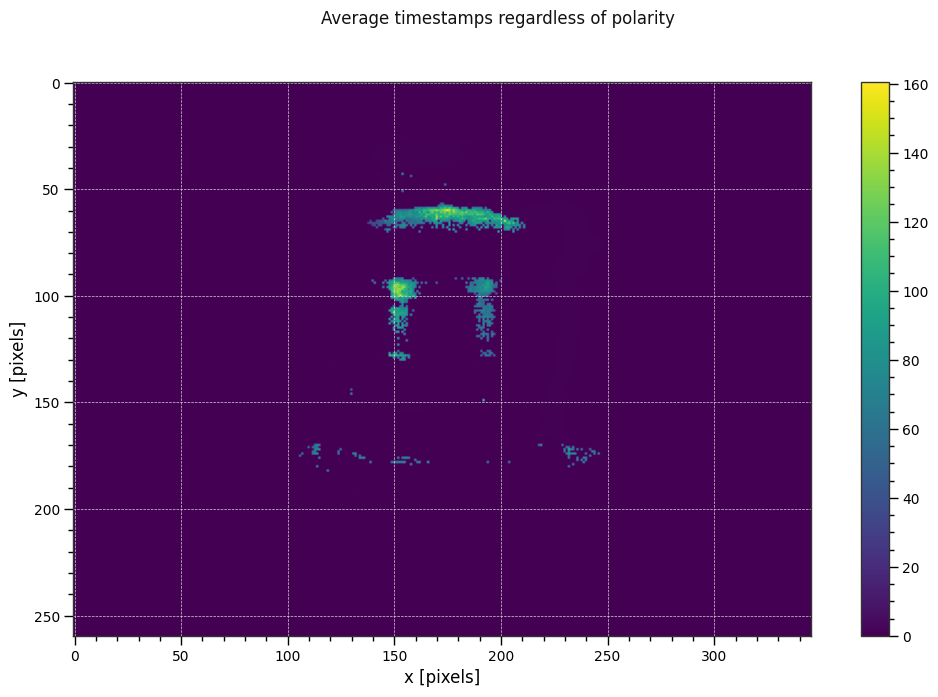

In [ ]:
# %% Average timestamp per pixel
sae = np.zeros(img_size, np.float32)
count = np.zeros(img_size, np.int8)
for i in range(num_events):
    sae[y[i],x[i]] += timestamp[i]
    count[y[i],x[i]] += 1

# Compute per-pixel average if count at the pixel is >1
count [count < 1] = 1  # to avoid division by zero
sae = sae / count

fig = plt.figure()
fig.suptitle('Average timestamps regardless of polarity')
plt.imshow(sae)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()


Next, split by polarity:

![](images/t_ave_pos.png)
![](images/t_ave_neg.png)

- Describe what you oberve compared to previous representations.

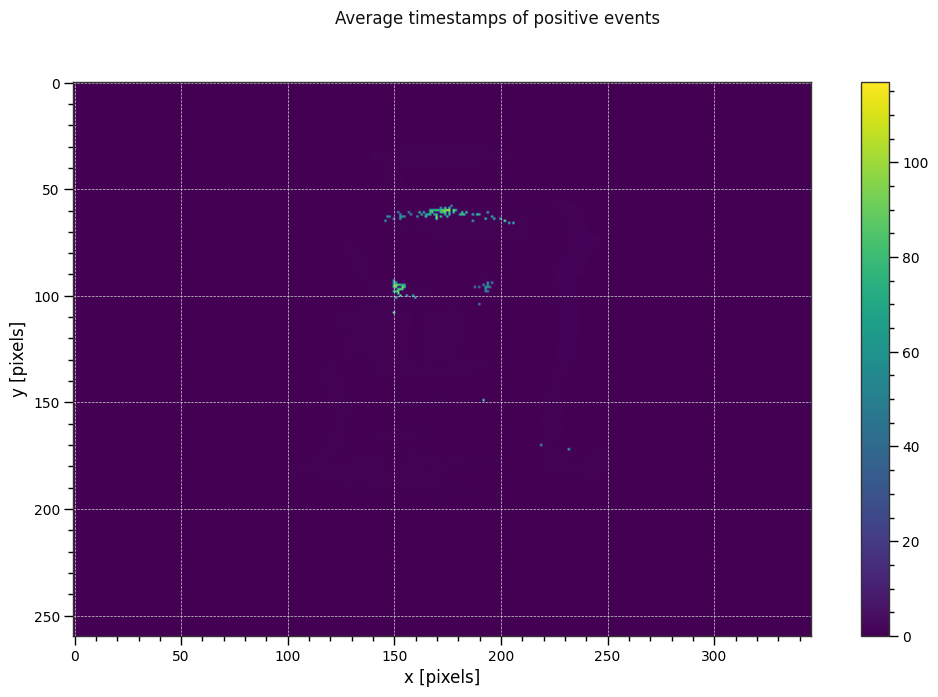

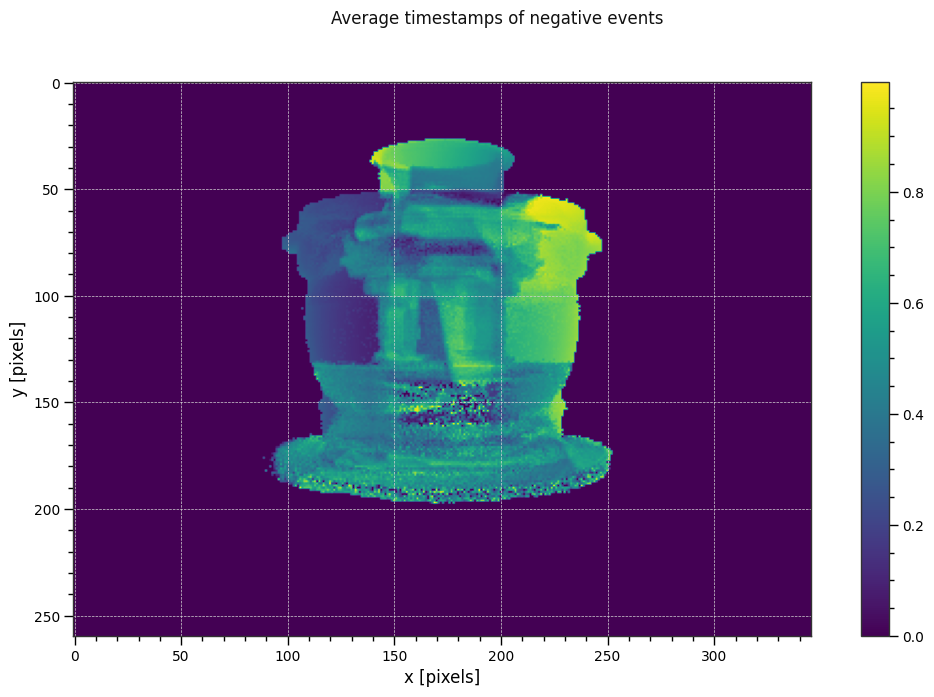

In [ ]:
# %% Average timestamp per pixel. Separate by polarity
sae_pos = np.zeros(img_size, np.float32)
sae_neg = np.zeros(img_size, np.float32)
count_pos = np.zeros(img_size, np.int8)
count_neg = np.zeros(img_size, np.int8)
for i in range(num_events):
    if (pol[i] > 0):
        sae_pos[y[i],x[i]] += timestamp[i]
        count_pos[y[i],x[i]] += 1
    else:
        sae_neg[y[i],x[i]] += timestamp[i]
        count_neg[y[i],x[i]] += 1

# Compute per-pixel average if count at the pixel is >1
count_pos [count_pos < 1] = 1;  sae_pos = sae_pos / count_pos
count_neg [count_neg < 1] = 1;  sae_neg = sae_neg / count_neg

fig = plt.figure()
fig.suptitle('Average timestamps of positive events')
plt.imshow(sae_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Average timestamps of negative events')
plt.imshow(sae_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()



# Space-time plots

Next, we take a look at different ways to visualize events in space-time. Such a space-time is obtained by considering a temporal window of the signal that is output by the camera as a response of the light arriving at the image plane (i.e., the "retina").

## Point set

Write Python code to plot the first $N_e = 2000$ events in space-time, like a point set or point "cloud":

![Events, space-time and polarity](images/space_time_pol.png)

You may find the [3D scatterplot example](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) useful.

Try experimenting by moving around the viewpoint (clicking on the figure generated by Python's matplotlib).

- For us, humans, is the information more intelligible from any specific viewpoint?
- What information do you gain by looking at this point cloud from directions parallel to each of the coordinate axes?

Then, write a function to generate a short **[movie](movie.mp4)** that smoothly shows the intermediate viewpoints between two specified ones (the start and end viewpoints). See the following VLC player screenshot.
Suggestion: use the matplotlib command `ax.view_init(azim=XXX,elev=ZZZ)`. Write images to disk and create a movie from them using ffmpeg. There is no need to install ffmpeg; you may use the [static build](https://johnvansickle.com/ffmpeg/). Video [coding options](https://trac.ffmpeg.org/wiki/Encode/H.264), such as lossless.

![movie snapthot on VLC](images/movie_vlc_pointset.png)

Space-time plot and movie: numevents =  6000


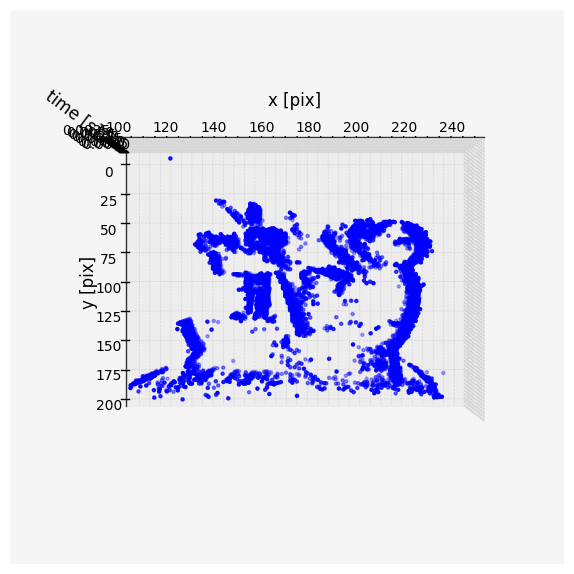

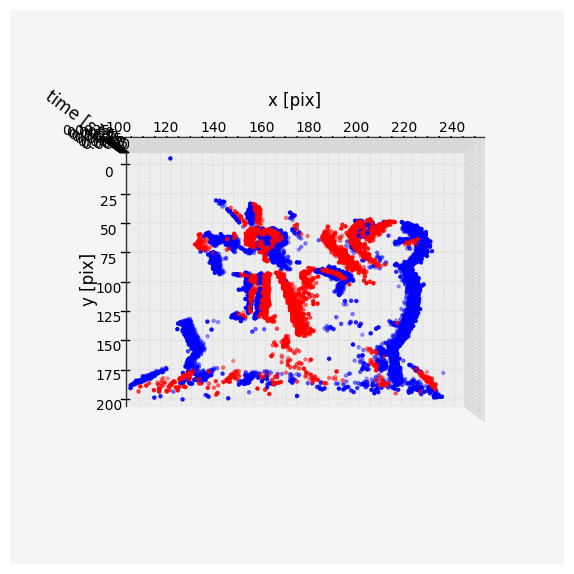

Directory  tempDir  already exists


<Figure size 1280x720 with 0 Axes>

In [ ]:
# _____________________________________________________________________________
# %% 3D plot
# Time axis in horizontal position

m = 6000 # Number of points to plot
print("Space-time plot and movie: numevents = ", m)

# Plot without polarity
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.set_aspect('equal') # only works for time in Z axis
ax.scatter(x[:m], timestamp[:m], y[:m], marker='.', c='b')
ax.set_xlabel('x [pix]')
ax.set_ylabel('time [s]')
ax.set_zlabel('y [pix] ')
ax.view_init(azim=-90, elev=-180) # Change viewpoint with the mouse, for example
plt.show()


# %% Plot each polarity with a different color (red / blue)
idx_pos = np.asarray(pol[:m]) > 0
idx_neg = np.logical_not(idx_pos)
xnp = np.asarray(x[:m])
ynp = np.asarray(y[:m])
tnp = np.asarray(timestamp[:m])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xnp[idx_pos], tnp[idx_pos], ynp[idx_pos], marker='.', c='b')
ax.scatter(xnp[idx_neg], tnp[idx_neg], ynp[idx_neg], marker='.', c='r')
ax.set(xlabel='x [pix]', ylabel='time [s]', zlabel='y [pix]')
ax.view_init(azim=-90, elev=-180)
plt.show()


# %% Transition between two viewpoints
num_interp_viewpoints = 60 # number of interpolated viewpoints
ele = np.linspace(-150,-180, num=num_interp_viewpoints)
azi = np.linspace( -50, -90, num=num_interp_viewpoints)

# Create directory to save images and then create a movie
dirName = 'tempDir'
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:
    print("Directory " , dirName ,  " already exists")

for ii in range(0,num_interp_viewpoints):
    ax.view_init(azim=azi[ii], elev=ele[ii])
    plt.savefig(dirName + "/movie%04d.png" % ii)

# %% Create a movie using ffmpeg static build (https://johnvansickle.com/ffmpeg/)
# Video coding options, such as lossless: https://trac.ffmpeg.org/wiki/Encode/H.264
def createMovie():
    os.system("ffmpeg -r 20 -i "
    + dirName  + "/movie%04d.png -c:v libx264 -crf 0 -y movie_new.mp4")

# Call the function to create the movie
createMovie()



## Voxel grid representation

Next, you are asked to write code to convert the event data into a 3D histogram. To this end, events shall be collected into bins: 1 bin per pixel in space and say 5 bins in time. Feel free to write your own function to compute the 3D histogram or to use numpy's [histogramdd](https://numpy.org/doc/stable/reference/generated/numpy.histogramdd.html?highlight=histogramdd#numpy.histogramdd) function. Actually it is good to compute the histogram using both methods and making sure that both agree.

### Regular histogram
Write python code to compute the 3D histogram and display it as a voxel grid.
Every voxel counts the number of events falling (i.e., binned) within it, regardless of polarity.
Suggestion: [this sample code](https://matplotlib.org/3.1.1/gallery/mplot3d/voxels_rgb.html#sphx-glr-gallery-mplot3d-voxels-rgb-py)

![voxel histogram](images/voxel_nn.png)

- What are the minimum and maximum number of events at any voxel?
- How many voxels are there? How many are "occupied" (i.e., have a non-zero value)? (voxel grids are also known as "occupancy maps" in Robotics). What is the ratio between these numbers? (How sparse is the data?)

### Interpolated histogram
(Smooth histogram that also includes polarity information).
Next, modify the code you have written to include polarity. That is, instead of counting events on every bin, "count" the polarity. Moreover, to make the histogram smoother, use a linear voting scheme by which an event splits its polarity in its two closest temporal bins. The split takes into account the distance from the event to both bins. (This idea of smoothing a histogram is similar to the idea of kernel density estimation). The following plot illustrates this idea of "smoothing" the histogram.

![histogram smoothing](images/histogram_smoothing.png)

The next figure shows the voxel grid obtained by using linear voting of polarity (per-voxel balance of linearly-interpolated polarity). Grayscale values are used: dark values represent negative events (voxels with negative balance of polarities) and bright values represent positive events (voxels with positive balance of polarities).

![voxel linear voting with polarity](images/voxel_linvote_pol.png)

- What are the minimum and maximum value of the balance of event polarities at the voxels?
- Does this way of computing the histogram, including polarity, affect the above "sparsity ratio"?
- How does this (3D) voxel grid representation compare to 2D representations? For example in terms of memory, in terms of preservation of the information contained in the event data?
- What could the voxel grid representation be good for?
- How would you interpret the above voxel grid in terms of a continuous "polarity field" $p(x,y,t)$ or the temporal derivative of the brightness signal arriving at the sensor $\frac{\partial L}{\partial t}(x,y,t)$?

## Try experimenting
Try to come up with new plots (alternative data representations) that reveal some aspect of the information contained in the event data.

Number of time bins =  5
[1.5000000e-06 3.0000000e-06 9.7500000e-06 ... 1.0126500e-01 1.0126575e-01
 1.0126725e-01]
0.10126725000000002 1.5000000000000002e-06
0.10126575000000002 5
0.020253150000000004
hist3d
(260, 346, 5)
60000

hist3dd
min =  0.0
max =  28.0
60000.0
0.0
Ratio of occupied bins =  0.04318808359270787


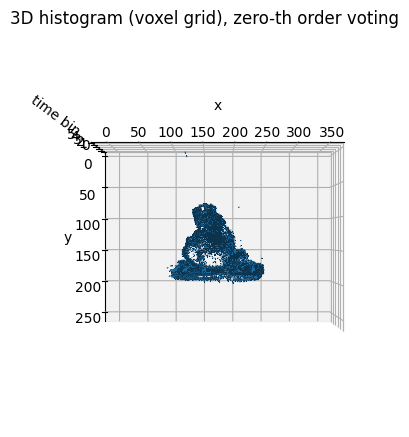


hist3d_interp
min =  0.0
max =  23.94544552328897
56908.46384266152
136.652937987704
Ratio of occupied bins =  0.05788128056914184


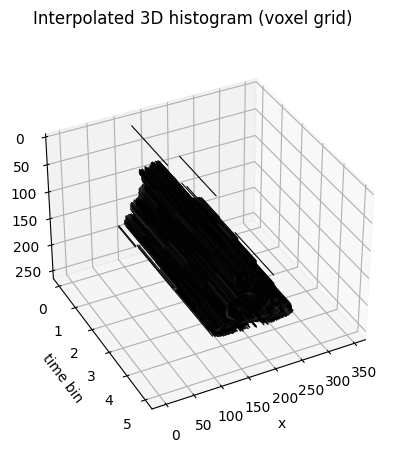


hist3d_interp_pol
min =  -30.215788655098095
max =  23.94544552328897
72065.15882344228
Ratio of occupied bins =  0.05788128056914184


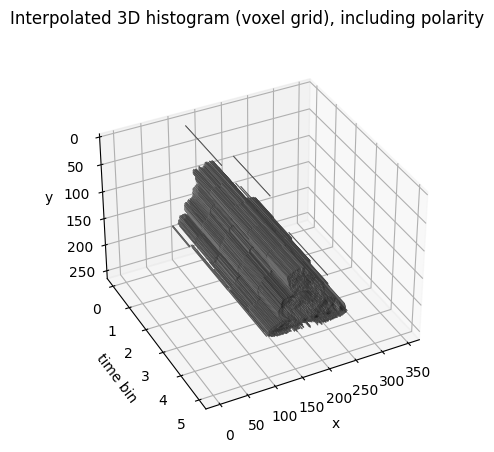

In [ ]:
# _____________________________________________________________________________
# %% Voxel grid

num_bins = 5
print("Number of time bins = ", num_bins)
print(timestamp[:m])
t_max = np.max(np.asarray(timestamp[:m]))
t_min = np.min(np.asarray(timestamp[:m]))
print(t_max, t_min)

t_range = t_max - t_min
print(t_range, num_bins)
dt_bin = t_range / num_bins # size of the time bins (bins)
print(dt_bin)
t_edges = np.linspace(t_min,t_max,num_bins+1) # Boundaries of the bins

# Compute 3D histogram of events manually with a loop
# ("Zero-th order or nearest neighbor voting")
hist3d = np.zeros(img.shape+(num_bins,), np.int8)
for ii in range(m):
    idx_t = int( (timestamp[ii]-t_min) / dt_bin )
    if idx_t >= num_bins:
        idx_t = num_bins-1 # only one element (the last one)
    hist3d[y[ii],x[ii],idx_t] += 1

# Checks:
print("hist3d")
print(hist3d.shape)
print(np.sum(hist3d)) # This should equal the number of votes


# %% Compute 3D histogram of events using numpy function histogramdd
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogramdd.html#numpy.histogramdd

# Specify bin edges in each dimension
bin_edges = (np.linspace(0,img_size[0],img_size[0]+1),
             np.linspace(0,img_size[1],img_size[1]+1), t_edges)
yxt = np.transpose(np.array([y[:m], x[:m], timestamp[:m]]))
hist3dd, edges = np.histogramdd(yxt, bins=bin_edges)

# Checks
print("\nhist3dd")
print("min = ", np.min(hist3dd))
print("max = ", np.max(hist3dd))
print(np.sum(hist3dd))
print(np.linalg.norm( hist3dd - hist3d)) # Check: zero if both histograms are equal
print("Ratio of occupied bins = ", np.sum(hist3dd > 0) / float(np.prod(hist3dd.shape)) )


# Plot of the 3D histogram. Empty cells are transparent (not displayed)
# Example: https://matplotlib.org/3.1.1/gallery/mplot3d/voxels_rgb.html#sphx-glr-gallery-mplot3d-voxels-rgb-py

fig = plt.figure()
fig.suptitle('3D histogram (voxel grid), zero-th order voting')
ax = fig.add_subplot(projection='3d')
# prepare some coordinates
r, g, b = np.indices((img_size[0]+1,img_size[1]+1,num_bins+1))
ax.voxels(g,b,r, hist3d) # No need to swap the data to plot with reordered axes
ax.set(xlabel='x', ylabel='time bin', zlabel='y')
ax.view_init(azim=-90, elev=-180) # edge-on, along time axis
#ax.view_init(azim=-63, elev=-145) # oblique viewpoint
plt.show()


# %% Compute interpolated 3D histogram (voxel grid)
hist3d_interp = np.zeros(img.shape+(num_bins,), np.float64)
for ii in range(m-1):
    tn = (timestamp[ii] - t_min) / dt_bin # normalized time, in [0,num_bins]
    ti = np.floor(tn-0.5) # index of the left bin
    dt = (tn-0.5) - ti    # delta fraction
    # Voting on two adjacent bins
    if ti >=0 :
        hist3d_interp[y[ii],x[ii],int(ti)  ] += 1. - dt
    if ti < num_bins-1 :
        hist3d_interp[y[ii],x[ii],int(ti)+1] += dt

# Checks
print("\nhist3d_interp")
print("min = ", np.min(hist3d_interp))
print("max = ", np.max(hist3d_interp))
print(np.sum(hist3d_interp))
# Some votes are lost because of the missing last layer
print(np.linalg.norm( hist3d - hist3d_interp))
print("Ratio of occupied bins = ", np.sum(hist3d_interp > 0) / float(np.prod(hist3d_interp.shape)) )

# Plot voxel grid
colors = np.zeros(hist3d_interp.shape + (3,))
tmp = hist3d_interp/np.amax(hist3d_interp) # normalize in [0,1]
colors[..., 0] = tmp
colors[..., 1] = tmp
colors[..., 2] = tmp

fig = plt.figure()
fig.suptitle('Interpolated 3D histogram (voxel grid)')
ax = fig.add_subplot(projection='3d')
ax.voxels(g,b,r, hist3d_interp, facecolors=colors)
ax.set(xlabel='x', ylabel='time bin', zlabel='y')
ax.view_init(azim=-63, elev=-145)
plt.show()

# %% A different visualization viewpoint
ax.view_init(azim=-90, elev=-180) # edge-on, along time axis
plt.show()


# %% Compute interpolated 3D histogram (voxel grid) using polarity
hist3d_interp_pol = np.zeros(img.shape+(num_bins,), np.float64)
for ii in range(m-1):
    tn = (timestamp[ii] - t_min) / dt_bin # normalized time, in [0,num_bins]
    ti = np.floor(tn-0.5) # index of the left bin
    dt = (tn-0.5) - ti    # delta fraction
    # Voting on two adjacent bins
    if ti >=0 :
        hist3d_interp_pol[y[ii],x[ii],int(ti)  ] += (1. - dt) * (2*pol[ii]-1)
    if ti < num_bins-1 :
        hist3d_interp_pol[y[ii],x[ii],int(ti)+1] += dt * (2*pol[ii]-1)

# Checks
# Some votes are lost because of the missing last layer
print("\nhist3d_interp_pol")
print("min = ", np.min(hist3d_interp_pol))
print("max = ", np.max(hist3d_interp_pol))
print(np.sum(np.abs(hist3d_interp_pol)))
print("Ratio of occupied bins = ", np.sum(np.abs(hist3d_interp_pol) > 0) / float(np.prod(hist3d_interp_pol.shape)) )

# Plot interpolated voxel grid using polarity
# Normalize the symmetric range to [0,1]
maxabsval = np.amax(np.abs(hist3d_interp_pol))
colors = np.zeros(hist3d_interp_pol.shape + (3,))
tmp = (hist3d_interp_pol + maxabsval)/(2*maxabsval)
colors[..., 0] = tmp
colors[..., 1] = tmp
colors[..., 2] = tmp

fig = plt.figure()
fig.suptitle('Interpolated 3D histogram (voxel grid), including polarity')
ax = fig.add_subplot(projection='3d')
ax.voxels(g,b,r, hist3d_interp_pol, facecolors=colors)
ax.set(xlabel='x', ylabel='time bin', zlabel='y')
ax.view_init(azim=-63, elev=-145)
plt.show()

# %% Better visualization viewpoint to see positive and negative edges
ax.view_init(azim=-90, elev=-180) # edge-on, along time axis
plt.show()

# Colour - Demosaicing

In [ ]:
import os

import colour

from colour_demosaicing import (
    ROOT_RESOURCES_EXAMPLES,
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

colour.plotting.colour_style()

colour.utilities.describe_environment();


/usr/local/lib/python3.10/dist-packages/colour/utilities/verbose.py:265: ColourWarning: "vaab/colour" was detected in "sys.path", please define a "COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=True" environment variable to import its objects into "colour" namespace!
  warn(*args, **kwargs)  # noqa: B028


*                                                                             *
*   Interpreter :                                                             *
*       python : 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.4                                                        *
*       colour-demosaicing : 0.2.5                                            *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.31.6                                                      *
*       matplotlib : 3.7.1                                                    *
*       networkx : 3.3                                                        *
*       numpy : 1.25.2                  

(16, 16, 3)


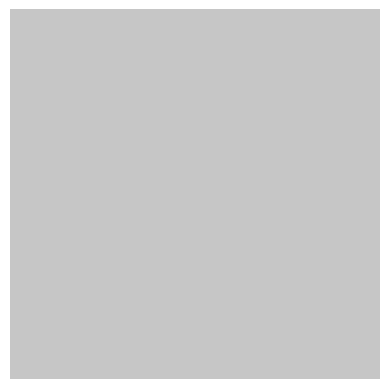

(16, 16, 3)


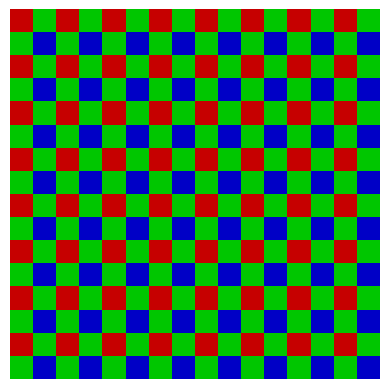

(16, 16, 3)


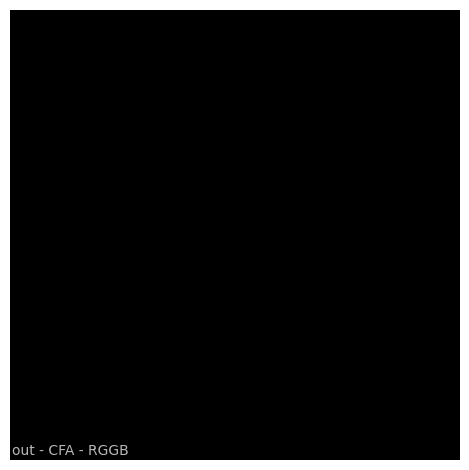

(16, 16)


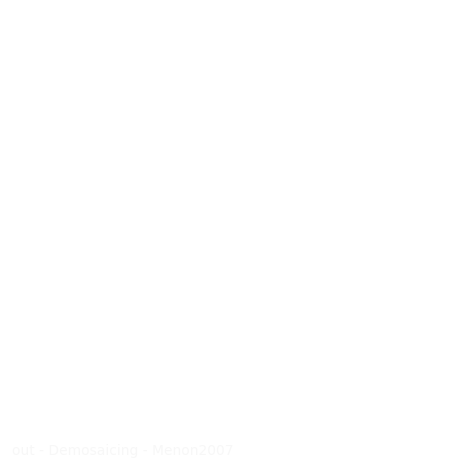

(16, 16, 3)


In [ ]:
F = np.array([[[1, 0, 0], [0, 1, 0]], [[0, 1, 0], [0, 0, 1]]])
width = 16
height = 16

F_tile = np.tile(F, (int(width/2), int(height/2), 1))
print(F_tile.shape)
# print(F[:10,:10])


# # Create a single-channel grayscale image with random intensity values
# gray_image = np.random.randint(0, 256, size=(height, width, 3)).astype(np.uint8)
gray_image = np.ones((width, height) + (3,), dtype=int) * 198

# # Generate the RGB image with Gaussian splatting
# gray_image = image

# 1
# Display the grayscale image
plt.imshow(gray_image, clim=(0, 255))
plt.axis('off')
plt.show()
print(gray_image.shape)

out = F_tile * gray_image

# 2
# Display the grayscale image
plt.imshow(out, cmap='gray', clim=(0, 255))
plt.axis('off')
plt.show()
print(out.shape)

CFA = mosaicing_CFA_Bayer(out)
# mosaic
colour.plotting.plot_image(
    colour.cctf_encoding(CFA),
    text_kwargs={'text': 'out - CFA - RGGB'})
print(CFA.shape)

# Menon2007
Menon2007 = demosaicing_CFA_Bayer_Menon2007(CFA)
colour.plotting.plot_image(
    colour.cctf_encoding(Menon2007),
    text_kwargs={'text': 'out - Demosaicing - Menon2007'});
print(Menon2007.shape)




3
Image shape: (260, 346, 3)
0.882353 0.0


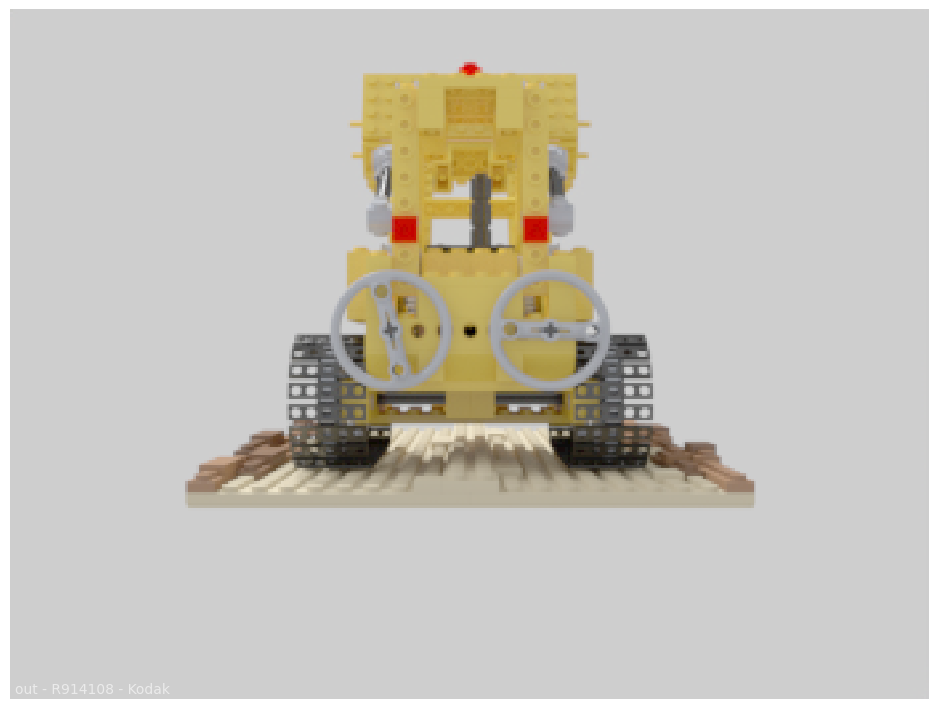

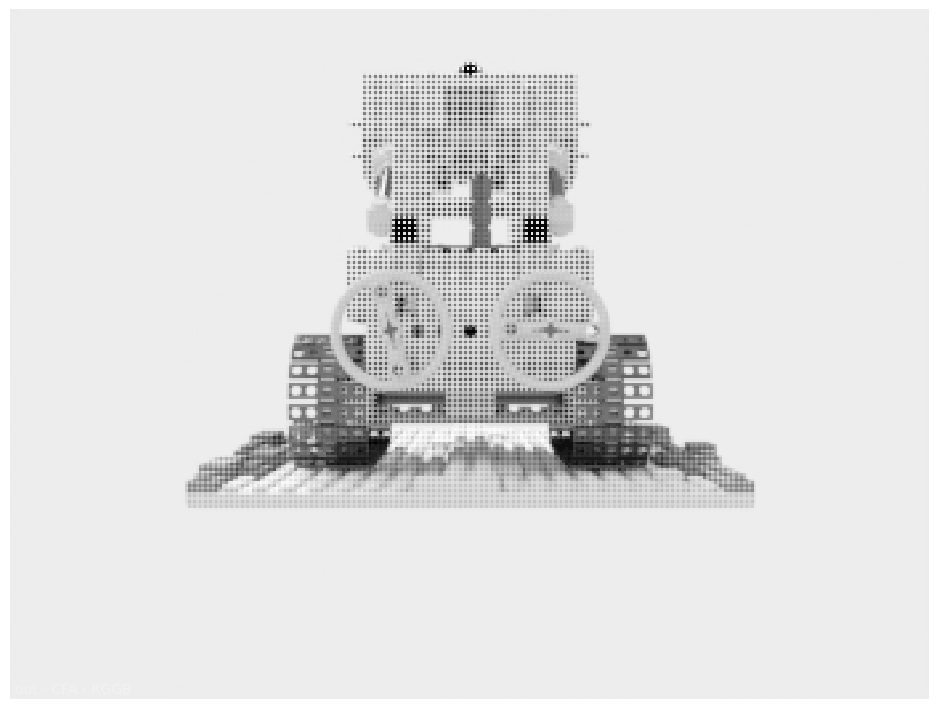

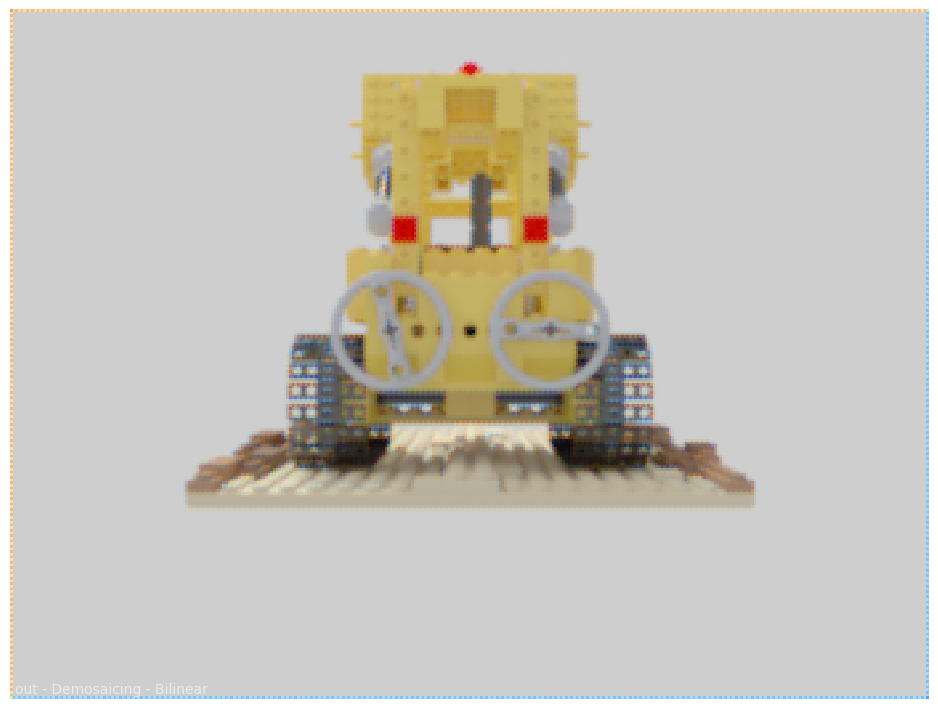

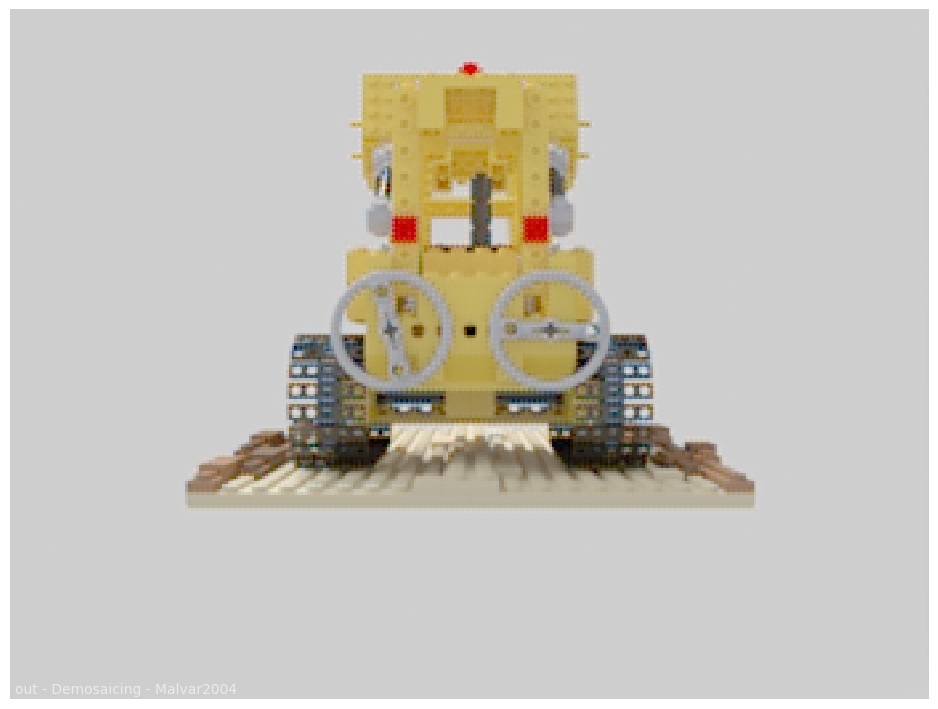

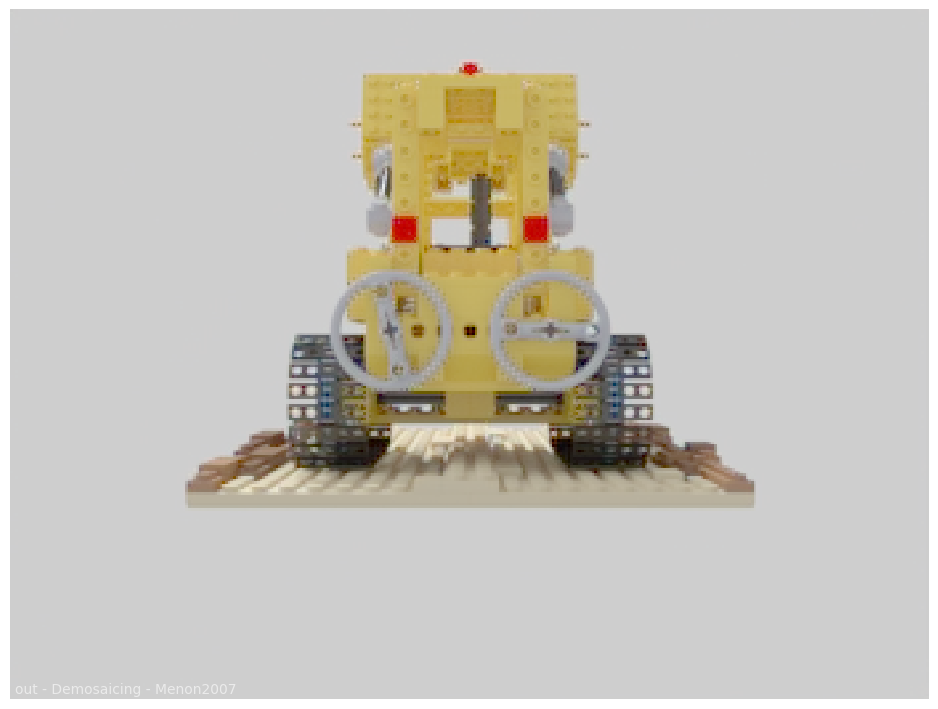

100
76.87079317461621
85.26386676821261
86.2425064343256


In [ ]:
import matplotlib.pyplot as plt
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Read the image using matplotlib
image = plt.imread('/content/r_00000.png')  # Replace 'your_image_path.jpg' with the path to your image file

print(image.shape[2])

# Ensure that the image is in RGB format (if it's not already)
if image.shape[2] == 4:  # Check if image has 4 channels (RGBA), if so, convert it to RGB
    image = image[:, :, :3]  # Remove the alpha channel

# Display the shape of the image array
print("Image shape:", image.shape)
# print(image[:10,:10]*255)
print(np.max(image), np.min(image))

# # Display the image
# plt.imshow(image, clim=(0, 255))
# plt.axis('off')  # Turn off axis
# plt.show()

# 0 ground_truth
colour.plotting.plot_image(
    colour.cctf_encoding(image),
    text_kwargs={'text': 'out - R914108 - Kodak'});

CFA = mosaicing_CFA_Bayer(image)

# Grayscale mosaic
mosaic = colour.cctf_encoding(CFA)

colour.plotting.plot_image(
    mosaic,
    text_kwargs={'text': 'out - CFA - RGGB'})

bilinear = demosaicing_CFA_Bayer_bilinear(CFA)
#1
colour.plotting.plot_image(
    colour.cctf_encoding(bilinear),
    text_kwargs={'text': 'out - Demosaicing - Bilinear'});

Malvar2004 = demosaicing_CFA_Bayer_Malvar2004(CFA)
#2
colour.plotting.plot_image(
    colour.cctf_encoding(Malvar2004),
    text_kwargs={'text': 'out - Demosaicing - Malvar2004'});
#3
Menon2007 = demosaicing_CFA_Bayer_Menon2007(CFA)
colour.plotting.plot_image(
    colour.cctf_encoding(Menon2007),
    text_kwargs={'text': 'out - Demosaicing - Menon2007'});

print(PSNR(image, image))
print(PSNR(image, bilinear))
print(PSNR(image, Malvar2004))
print(PSNR(image, Menon2007))



<class 'numpy.ndarray'> (260, 346, 3)
<class 'numpy.ndarray'> (260, 346, 3)


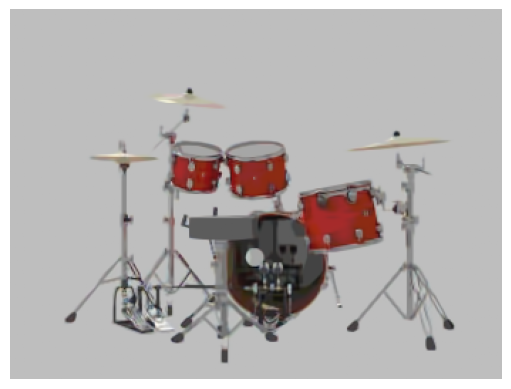

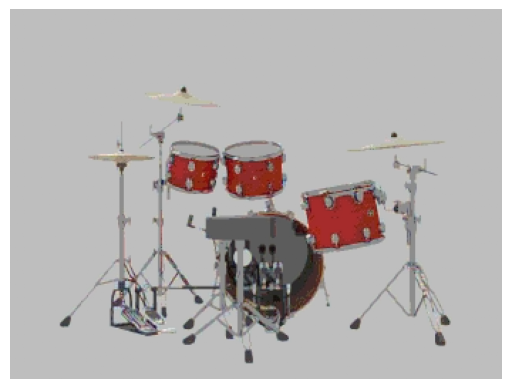

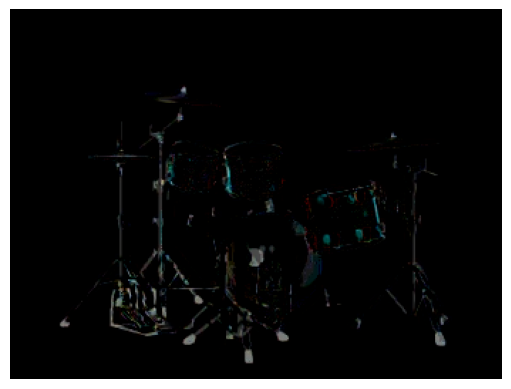

0.0 1.0
-0.709804 0.698039


In [ ]:
# Read the image using matplotlib
image_1 = plt.imread('/content/debayer_bm4d_10.png')  # Replace 'your_image_path.jpg' with the path to your image file
image_2 = plt.imread('/content/Menon2007.png')  # Replace 'your_image_path.jpg' with the path to your image file

print(type(image_1),image_1.shape)
print(type(image_2),image_2.shape)

plt.imshow(image_1, clim=(0, 255))
plt.axis('off')  # Turn off axis
plt.show()
plt.imshow(image_2, clim=(0, 255))
plt.axis('off')  # Turn off axis
plt.show()
plt.imshow((image_1-image_2), clim=(0, 255))
plt.axis('off')  # Turn off axis
plt.show()

print(np.min((image_1)),np.max((image_1)) )
print(np.min((image_1-image_2)),np.max((image_1-image_2)) )

# Event Reader Class

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import math
import json
import cv2
import imageio
import bm4d
import os
import colour
from colour_demosaicing import (
    ROOT_RESOURCES_EXAMPLES,
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

num_events = 53644

class EventImageDatamanager:
    """
    A datamanager that outputs full images and cameras instead of raybundles.
    This makes the datamanager more lightweight since we don't have to do generate rays.
    Useful for full-image training e.g. rasterization pipelines.
    deblur_method = ["bilinear", "Malvar2004", "Menon2007"]
    The BM4D is the deblur stage, which take quite a long time. Default is off, but it can significantly
    improve synthetic datasets.
    """
    def __init__(self, event_file_path, pose_directory, out_directory, width, height, debayer_method=None, is_real= False , sigma=0):
        self.img_size = (height, width)
        self.debayer = False
        self.is_real = is_real # Real or Synthetic data
        self.cycle = True
        if self.is_real: self.cycle, self.max_winsize = True, 100
        else: self.max_winsize = 50
        self.randomize_winlen = True
        self.events_collections = {}
        self.files = []
        self.idx = []
        self.idx_pre = []
        self.frame = []
        self.frame_pre  = []

        # self.img = np.zeros(self.img_size, dtype=np.int8)
        self.event_file_path = event_file_path
        self.pose_directory = pose_directory
        self.out_directory = out_directory
        self.F = np.array([[[1, 0, 0], [0, 1, 0]], [[0, 1, 0], [0, 0, 1]]])
        self.F_tile = np.tile(self.F, (int(height/2), int(width/2), 1))
        self.debayer_method = debayer_method
        self.deblur = False

        if sigma>0:
            self.deblur = True
            self.sigma = sigma
        self.getEventData()

        # Check if the directory exists, create it if it doesn't
        if not os.path.exists(self.out_directory):
            os.makedirs(self.out_directory)

    def loadEventNPZData(self):
        """Idx: Store the event line of the timestep for each output frames. range from [0-999]
           Usage: idx[t_i-1] to idx[t_i] capture events motion image.
                   0         to idx[t_i] capture RGB image
        """
        self.event_data = np.load(self.event_file_path)
        self.timestamp, self.x, self.y, self.pol = self.event_data['t'], self.event_data['x'], self.event_data['y'], self.event_data['p']
        print("Data length:", len(self.timestamp))

        self.get_Event_Pair()

        # print("idx: ", self.idx)
        # print("pre_idx: ", self.idx_pre)
        print("events_collections: ")
        for key in self.events_collections:
            print(key)
            print(self.events_collections[key])

    def loadEventTXTData(self):
        self.event_data = np.loadtxt(self.event_file_path,dtype={'formats': ('f4', 'i4', 'i4', 'i4')})
        # print(self.event_data)
        # print(self.event_data.shape)
        self.timestamp, self.x, self.y, self.pol = self.event_data[:,0], self.event_data[:,1], self.event_data[:,2], self.event_data[:,3]

        print("Data length:", len(self.timestamp))
        self.get_Event_Pair()

        # print("idx: ", self.idx)
        # print("pre_idx: ", self.idx_pre)
        print("events_collections: ")
        for key in self.events_collections:
            print(key)
            print(self.events_collections[key])

    def get_Event_Pair(self):
        max_winsize = self.max_winsize
        start_range = 0 if self.cycle else 1+max_winsize
        j=0
        t = self.timestamp[0]
        frame = 0
        for j in range(107500):
            if self.timestamp[j]>t:
                print("Data shutter:", j)
                break
        start_pt = 0
        for k in range(start_pt,len(self.timestamp)):
            if self.timestamp[k]>t:
                # print('Data streams per frame:',k-start_pt,t)
                start_pt = k
                t+= (self.timestamp[-1] - self.timestamp[0])/1000
                self.files.append(k-1)
                continue

        # self.events_collections["idx"] = self.idx

        self.events_collections["events"] = []

        # Calculate start and end streams and load events

        for i in range(start_range, len(self.files)):
            if self.randomize_winlen:
                winsize = np.random.randint(1, max_winsize+1)
            else:
                winsize = max_winsize

            # what is -1 for? for i=last frame covering all events
            start_time = (i-winsize)/(len(self.files)-1)
            if start_time < 0:
                start_time += 1
            end_time = (i)/(len(self.files)-1)

            # Ending Streams lines
            end = np.searchsorted(self.timestamp, end_time * self.timestamp.max())

            # if win_constant_count != 0:
            #     # TODO: there could be a bug with windows in the start, e.g., end-win_constant_count<0
            #     #       please, check if the windows are correctly composed in that case
            #     start_time = self.timestamp[end-win_constant_count]/self.timestamp.max()

            #     if win_constant_count > end:
            #         start_time = start_time - 1

            #     winsize = int(i-start_time*(len(self.files)-1))
            #     assert(winsize>0)
            #     start_time = (i-winsize)/(len(self.files)-1)

            #     if start_time < 0:
            #         start_time += 1

            # Find Start Streams lines
            start = np.searchsorted(self.timestamp, start_time * self.timestamp.max())
            # print(start, end, end-start)
            if start <= end:
                # normal case: take the interval between
                events = (self.x[start:end], self.y[start:end], self.timestamp[start:end], self.pol[start:end])
            else:
                # loop over case: compose tail with head events
                events = (np.concatenate((self.x[start:], self.x[:end])),
                        np.concatenate((self.y[start:], self.y[:end])),
                        np.concatenate((self.timestamp[start:], self.timestamp[:end])),
                        np.concatenate((self.pol[start:], self.pol[:end])),
                        )
            # print(events)

            # print(start_time, end_time, start, end, (i-winsize+len(self.files))%len(self.files), i )
            # Corresponding stream number of t0
            self.idx_pre.append(start)
            # Corresponding stream number of t
            self.idx.append(end)
            # t0 frame: for example 3 (uniform pick from 0-100)
            self.frame_pre.append((i-winsize+len(self.files))%len(self.files))
            # t frame: for example 100
            self.frame.append(i)
            self.events_collections["events"].append(events)

        self.events_collections["idx_pre"] = self.idx_pre
        self.events_collections["idx"] = self.idx
        self.events_collections["frame_pre"] = self.frame_pre
        self.events_collections["frame"] = self.frame

        return self.events_collections

    def getFileType(self):
        root, ext = os.path.splitext(self.event_file_path)
        return ext

    def getEventData(self):
        if self.getFileType() == ".txt":
            print("Loaded txt")
            self.loadEventTXTData()

        if self.getFileType() == ".npz":
            print("Loaded npz")
            self.loadEventNPZData()

    def scale_img(self, array):
        min_val = np.min(array)
        max_val = np.max(array)
        sf = 255 / (max_val - min_val)
        scaled_array = ((array - min_val) * sf).astype(np.uint8)
        return scaled_array

    def convertCameraImg(self, num_events, start=0):
        # print("before:", np.max(img), np.min(img))
        # self.img = np.zeros(self.img_size , dtype=np.float32)
        # self.img = np.zeros(self.img_size , dtype=np.float32) + np.log(125) / 2.2
        self.img = np.zeros(self.img_size , dtype=np.float32) + np.log(127) / 2.2
        self.bayer = np.zeros(self.img_size, np.float32)
        start = start

        # print(self.img[:5,:5])

        print("Load event img at :", num_events)
        self.t_ref = self.timestamp[0] # time of the last event in the packet
        self.tau = 0.03 # decay parameter (in seconds)
        self.dt = num_events*10

        for i in range(start, num_events):
            self.img[self.y[i], self.x[i]] += self.pol[i]

        bg_mask = self.img == np.log(127) / 2.2

        self.img = np.tile(self.img[..., None], (1, 1, 3))
        # img = np.tile(img[..., None], (1, 1, 3)) + np.log(159) / 2.2

        print(self.img[:2,:2])
        print("1. Before:", np.max(self.img), np.min(self.img), self.img.shape)

        self.bayer = self.scale_img(self.img)

        # Apply mask
        # self.bayer[bg_mask] = 198

        self.img_gray = self.bayer
        self.bayer = self.F_tile * self.img_gray
        print("bayer input", np.max(self.bayer), np.min(self.bayer))
        self.bayer = np.clip(np.exp(self.bayer * 2.2), 0, 255).astype(np.uint8)

        if self.debayer_method:
            # mosaic
            self.CFA = mosaicing_CFA_Bayer(self.img_gray)
            print('here')
            # Menon2007
            if self.debayer_method == "bilinear":
                self.bayer = demosaicing_CFA_Bayer_bilinear(self.CFA)
            if self.debayer_method == "Malvar2004":
                self.bayer = demosaicing_CFA_Bayer_Malvar2004(self.CFA)
            if self.debayer_method == "Menon2007":
                self.bayer = demosaicing_CFA_Bayer_Menon2007(self.CFA)
            self.bayer = self.scale_img(self.bayer)
            print("debayer_method", np.max(self.bayer), np.min(self.bayer))

        if self.deblur:
            self.bayer = bm4d.bm4d(self.bayer, self.sigma); # white noise: include noise std
            self.bayer = self.scale_img(self.bayer)

        # # Set background color for RGB
        # self.bayer[bg_mask] = 125

        # # Apply mask
        # self.bayer[bg_mask] = 198
        # self.bayer = np.clip(np.exp(self.bayer * 2.2), 0, 255).astype(np.uint8)
        # self.bayer = np.exp(self.bayer * 2.2)

        print(self.bayer[:2,:2])
        print("2. After:", np.max(self.bayer), np.min(self.bayer), self.bayer.shape)

        return self.img_gray, self.bayer

    def AccuDiffCameraImg(self, t_0, t):
        """ Eq.3 the observed events {Ei}_{i=1}^N between rendered views (multiplied by Bayer colour filter)
        taken at two different time instants t0 and t. (t - t_0).
        """
        return self.convertCameraImg(t, t_0)

    def ImgPlot(self, img):
        fig = plt.figure(figsize=(21,6))
        plt.subplot(1,4,1)
        plt.imshow(img[:,:,0], clim=(0, 255))
        plt.subplot(1,4,2)
        plt.imshow(img[:,:,1], clim=(0, 255))
        plt.subplot(1,4,3)
        plt.imshow(img[:,:,2], clim=(0, 255))
        plt.subplot(1,4,4)
        plt.imshow(img, clim=(0, 255))
        plt.show()

    def ImgSave(self, img, file_path, file_name):
        # Save the image to a PNG file
        imageio.imwrite(file_path + '/' + str(file_name) +'.png', img)

    def convert_to_images(self):
        """nerfstudio style/format
        """
        OUT_PATH = os.path.normpath(self.out_directory + '/' + "images" + "/")
        # Check if the directory exists, create it if it doesn't
        if not os.path.exists(OUT_PATH):
            os.makedirs(OUT_PATH)
        # Loop all the images
        frame = 0
        self.img = np.zeros(self.img_size , dtype=np.float32) + np.log(127) / 2.2
        self.bayer = np.zeros(self.img_size, np.float32)
        num_events = len(self.timestamp)

        # if not self.is_real:

        start = 0
        while frame < len(self.files)-1:
            for i in range(start, num_events-1):
                img_name = str(f"r_{'{:05d}'.format(frame)}")
                self.img[self.y[i], self.x[i]] += self.pol[i]
                # If the event frame reach the camera frame, trigger save
                if frame == len(self.files): break
                if i == self.idx[frame]:
                    print(i, frame,self.idx[frame])
                    frame += 1
                    bg_mask = self.img == np.log(127) / 2.2
                    self.img_temp = np.tile(self.img[..., None], (1, 1, 3))
                    self.bayer = self.scale_img(self.img_temp)

                    self.img_gray = self.bayer
                    self.bayer = self.F_tile * self.img_gray
                    self.bayer = np.clip(np.exp(self.bayer * 2.2), 0, 255).astype(np.uint8)

                    if self.debayer_method:
                        # mosaic
                        self.CFA = mosaicing_CFA_Bayer(self.img_gray)
                        # Menon2007
                        if self.debayer_method == "bilinear":
                            self.bayer = demosaicing_CFA_Bayer_bilinear(self.CFA)
                        if self.debayer_method == "Malvar2004":
                            self.bayer = demosaicing_CFA_Bayer_Malvar2004(self.CFA)
                        if self.debayer_method == "Menon2007":
                            self.bayer = demosaicing_CFA_Bayer_Menon2007(self.CFA)
                        self.bayer = self.scale_img(self.bayer)

                    if self.deblur:
                        self.bayer = bm4d.bm4d(self.bayer, self.sigma); # white noise: include noise std
                        self.bayer = self.scale_img(self.bayer)
                    print(OUT_PATH, img_name)

                    self.ImgSave( self.bayer, OUT_PATH, img_name)

    def convert_to_images_uniform(self):
        """nerfstudio style/format; Use the uniform selected previous frame stroed in self.events_collections
            Designed for real event camera data.
        """
        OUT_PATH = os.path.normpath(self.out_directory + '/' + "images" + "/")
        # Check if the directory exists, create it if it doesn't
        if not os.path.exists(OUT_PATH):
            os.makedirs(OUT_PATH)

        # if not self.is_real:

        start = 0
        for frame in self.events_collections["frame"]:
            print(frame, self.events_collections["idx_pre"][frame], self.events_collections["idx"][frame])
            temp_event = self.events_collections["events"][frame]
            # print(temp_event)
            print(temp_event[0].shape)
            curr_x, curr_y, _, curr_pol = temp_event[0], temp_event[1], temp_event[2], temp_event[3]
            self.img = np.zeros(self.img_size , dtype=np.float32) + np.log(127) / 2.2
            self.bayer = np.zeros(self.img_size, np.float32)

            for i in range(0, len(curr_x)):
                img_name = str(f"r_{'{:05d}'.format(frame)}")
                self.img[curr_y[i], curr_x[i]] += curr_pol[i]

            print(frame, img_name)
            bg_mask = self.img == np.log(127) / 2.2
            self.img_temp = np.tile(self.img[..., None], (1, 1, 3))
            self.bayer = self.scale_img(self.img_temp)

            self.img_gray = self.bayer
            self.bayer = self.F_tile * self.img_gray
            self.bayer = np.clip(np.exp(self.bayer * 2.2), 0, 255).astype(np.uint8)

            if self.debayer_method:
                # mosaic
                self.CFA = mosaicing_CFA_Bayer(self.img_gray)
                # Menon2007
                if self.debayer_method == "bilinear":
                    self.bayer = demosaicing_CFA_Bayer_bilinear(self.CFA)
                if self.debayer_method == "Malvar2004":
                    self.bayer = demosaicing_CFA_Bayer_Malvar2004(self.CFA)
                if self.debayer_method == "Menon2007":
                    self.bayer = demosaicing_CFA_Bayer_Menon2007(self.CFA)
                self.bayer = self.scale_img(self.bayer)

            if self.deblur:
                self.bayer = bm4d.bm4d(self.bayer, self.sigma); # white noise: include noise std
                self.bayer = self.scale_img(self.bayer)
            print(OUT_PATH, img_name)

            # self.ImgSave( self.bayer, OUT_PATH, img_name)
            self.ImgSave( self.img_gray, OUT_PATH, img_name)

            print(f"writing {OUT_PATH}")

    def convert_to_image_uniform(self):
        """nerfstudio style/format; Use the uniform selected previous frame stroed in self.events_collections
            Designed for real event camera data.
        """

        start = 0
        for frame in self.events_collections["frame"]:
            print(frame, self.events_collections["idx_pre"][frame], self.events_collections["idx"][frame])
            temp_event = self.events_collections["events"][frame]
            # print(temp_event)
            print(temp_event[0].shape)
            curr_x, curr_y, _, curr_pol = temp_event[0], temp_event[1], temp_event[2], temp_event[3]
            self.img = np.zeros(self.img_size , dtype=np.float32) + np.log(127) / 2.2
            self.bayer = np.zeros(self.img_size, np.float32)

            for i in range(0, len(curr_x)):
                img_name = str(f"r_{'{:05d}'.format(frame)}")
                self.img[curr_y[i], curr_x[i]] += curr_pol[i]

            print(frame, img_name)
            bg_mask = self.img == np.log(127) / 2.2
            self.img_temp = np.tile(self.img[..., None], (1, 1, 3))
            self.bayer = self.scale_img(self.img_temp)

            self.img_gray = self.bayer
            self.bayer = self.F_tile * self.img_gray
            self.bayer = np.clip(np.exp(self.bayer * 2.2), 0, 255).astype(np.uint8)

            if self.debayer_method:
                # mosaic
                self.CFA = mosaicing_CFA_Bayer(self.img_gray)
                # Menon2007
                if self.debayer_method == "bilinear":
                    self.bayer = demosaicing_CFA_Bayer_bilinear(self.CFA)
                if self.debayer_method == "Malvar2004":
                    self.bayer = demosaicing_CFA_Bayer_Malvar2004(self.CFA)
                if self.debayer_method == "Menon2007":
                    self.bayer = demosaicing_CFA_Bayer_Menon2007(self.CFA)
                self.bayer = self.scale_img(self.bayer)

            if self.deblur:
                self.bayer = bm4d.bm4d(self.bayer, self.sigma); # white noise: include noise std
                self.bayer = self.scale_img(self.bayer)
            print(OUT_PATH, img_name)

            # self.ImgSave( self.bayer, OUT_PATH, img_name)
            self.ImgSave( self.img_gray, OUT_PATH, img_name)

            print(f"writing {OUT_PATH}")

    def PoseRead(self, file_path, frame_num):
        file_path = os.path.join(file_path, 'r_'+'{:05d}'.format(frame_num) + ".txt")
        try:
            with open(file_path, 'r') as file:
                # Read each line in the file
                lines = file.readlines()
                # Parse each line to extract the elements of the camera matrix
                camera_matrix = []
                for line in lines:
                    elements = line.split()
                    camera_matrix.append([float(element) for element in elements])
                camera_matrix = np.array(camera_matrix)
                # print("test:", camera_matrix)
                return camera_matrix

        except FileNotFoundError:
            print(f"Error: File '{file_path}' not found.")
            return None
        except Exception as e:
            print(f"Error: {e}")
            return None

    def rotmat(self, a, b):
        a, b = a / np.linalg.norm(a), b / np.linalg.norm(b)
        v = np.cross(a, b)
        c = np.dot(a, b)
        s = np.linalg.norm(v)
        kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
        return np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2 + 1e-10))

    def closest_point_2_lines(self, oa, da, ob, db): # returns point closest to both rays of form o+t*d, and a weight factor that goes to 0 if the lines are parallel
        da = da / np.linalg.norm(da)
        db = db / np.linalg.norm(db)
        c = np.cross(da, db)
        denom = np.linalg.norm(c)**2
        t = ob - oa
        ta = np.linalg.det([t, db, c]) / (denom + 1e-10)
        tb = np.linalg.det([t, da, c]) / (denom + 1e-10)
        if ta > 0:
            ta = 0
        if tb > 0:
            tb = 0
        return (oa+ta*da+ob+tb*db) * 0.5, denom

    def convert_to_json(self):
        """nerfstudio style/format
        """
        AABB_SCALE = 1
        text = os.path.normpath(self.pose_directory) # + '/text')
        OUT_PATH = os.path.normpath(self.out_directory + '/' + "transforms.json")
        # sparce = os.path.normpath(args.scenedir + '/sparse')

        # 1 SIMPLE_RADIAL 2048 1536 1580.46 1024 768 0.0045691
        # 1 OPENCV 3840 2160 3178.27 3182.09 1920 1080 0.159668 -0.231286 -0.00123982 0.00272224
        # 1 RADIAL 1920 1080 1665.1 960 540 0.0672856 -0.0761443

        w = self.img_size[1]
        h = self.img_size[0]
        fl_x = 389.25 if self.is_real else 480.55
        fl_y = 389.25 if self.is_real else 480.55
        k1 = 0
        k2 = 0
        p1 = 0
        p2 = 0
        cx = w / 2
        cy = h / 2

        # angle_x = math.atan(w / (fl_x * 2)) * 2
        # angle_y = math.atan(h / (fl_y * 2)) * 2
        # fovx = angle_x * 180 / math.pi
        # fovy = angle_y * 180 / math.pi

        # with open(os.path.join(text,"images.txt"), "r") as f:
        bottom = np.array([0.0, 0.0, 0.0, 1.0]).reshape([1, 4])
        out = {
            # "camera_angle_x": angle_x,
            # "camera_angle_y": angle_y,
            "fl_x": fl_x,
            "fl_y": fl_y,
            "cx": cx,
            "cy": cy,
            "w": w,
            "h": h,
            "camera_model": "OPENCV",
            "k1": k1,
            "k2": k2,
            "p1": p1,
            "p2": p2,
            # "aabb_scale": AABB_SCALE,
            "frames": [],
        }

        up = np.zeros(3)

        for i in range(len(self.files)):
            if  i % 1 == 0:
                # elems=line.split(" ") # 1-4 is quat, 5-7 is trans, 9ff is filename (9, if filename contains no spaces)
                pose_path = self.pose_directory
                name = str(f"./images/r_{'{:05d}'.format(i)}.png")
                print(name)
                # b=sharpness(os.path.normpath(f"{args.scenedir}/{args.images}/{elems[9]}"))
                # image_id = int(elems[0])

                # qvec = np.array(tuple(map(float, elems[1:5])))
                # tvec = np.array(tuple(map(float, elems[5:8])))
                # R = qvec2rotmat(-qvec)
                # t = tvec.reshape([3,1])
                # m = np.concatenate([np.concatenate([R, t], 1), bottom], 0)

                # m = self.PoseRead(pose_path, i)
                # c2w = np.linalg.inv(m)
                # up += c2w[0:3,1]

                # https://github.com/nerfstudio-project/nerfstudio/issues/1504
                c2w = self.PoseRead(pose_path, i)
                c2w[0:3,2] *= -1 # flip the y and z axis
                c2w[0:3,1] *= -1
                c2w = c2w[[1,0,2,3],:] # swap y and z
                c2w[2,:] *= -1 # flip whole world upside down

                # Add pre_camera for the re-ordering in event_nerfstudio_dataparser.py
                frame={"file_path":name, "pre_camera": self.events_collections["frame_pre"][i], "transform_matrix": c2w}
                out["frames"].append(frame)

        nframes = len(out["frames"])



        # up = up / np.linalg.norm(up)
        # print("up vector was", up)
        # R = self.rotmat(up,[0,0,1]) # rotate up vector to [0,0,1]
        # R = np.pad(R,[0,1])
        # R[-1, -1] = 1


        # for f in out["frames"]:
        #     f["transform_matrix"] = np.matmul(R, f["transform_matrix"]) # rotate up to be the z axis

        # # find a central point they are all looking at
        # print("computing center of attention...")
        # totw = 0.0
        # totp = np.array([0.0, 0.0, 0.0])
        # for f in out["frames"]:
        #     mf = f["transform_matrix"][0:3,:]
        #     for g in out["frames"]:
        #         mg = g["transform_matrix"][0:3,:]
        #         p, w = self.closest_point_2_lines(mf[:,3], mf[:,2], mg[:,3], mg[:,2])
        #         if w > 0.01:
        #             totp += p*w
        #             totw += w
        # totp /= totw
        # print(totp) # the cameras are looking at totp

        # for f in out["frames"]:
        #     f["transform_matrix"][0:3,3] -= totp

        avglen = 0.
        for f in out["frames"]:
            avglen += np.linalg.norm(f["transform_matrix"][0:3,3])
        avglen /= nframes
        print("avg camera distance from origin", avglen)

        for f in out["frames"]:
            f["transform_matrix"][0:3,3] *= 4.0 / avglen # scale to "nerf sized"

        for f in out["frames"]:
            f["transform_matrix"] = f["transform_matrix"].tolist()

        print(nframes,"frames")
        print(f"writing {OUT_PATH}")
        with open(OUT_PATH, "w") as outfile:
            json.dump(out, outfile, indent=2)
        print("Writing Completed")


/usr/local/lib/python3.10/dist-packages/colour/utilities/verbose.py:265: ColourWarning: "vaab/colour" was detected in "sys.path", please define a "COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=True" environment variable to import its objects into "colour" namespace!
  warn(*args, **kwargs)  # noqa: B028


# Design events vs camera_frame

In [ ]:
def scale_img( array):
    min_val = np.min(array)
    max_val = np.max(array)
    sf = 255 / (max_val - min_val)
    scaled_array = ((array - min_val) * sf).astype(np.uint8)
    return scaled_array

file_path = '/content/drive/MyDrive/Project/2024 Spring/CMSC848B/events.npz'
# file_path = '/content/events_viz/slider_depth/events_chunk.txt'
# file_path = '/content/drive/MyDrive/Project/2024 Spring/CMSC848B/b10_cal1_45rpm_gfox_eonly-2022_05_12_01_17_04_shift_ts1.npz'   # sewing
# file_path = '/content/drive/MyDrive/Project/2024 Spring/CMSC848B/test_lego1_color_init159_1e-6eps.npz'


eventData = EventImageDatamanager(file_path, "/content/", "/content/lego", 346, 260, debayer_method="Menon2007", is_real=True, sigma=0)
# eventData = EventImageDatamanager(file_path, 240, 180, debayer_method="Menon2007", sigma=0)
print(eventData.idx)

t_0 = eventData.idx[964]
t = eventData.idx[1]

print(t_0, t)

img_t0_gray, img_t0 = eventData.convertCameraImg(t_0)
img_t_gray, img_t = eventData.convertCameraImg(t)
# img_dt_gray, img_dt = eventData.AccuDiffCameraImg(t_0, t)

eventData.ImgPlot(img_t0_gray)
eventData.ImgPlot(img_t_gray)
eventData.ImgPlot(img_t_gray-img_t0_gray)

# eventData.ImgPlot(img_t0)
# eventData.ImgPlot(img_t)
# eventData.ImgPlot(img_dt)

# eventData.ImgSave(img_dt, "/content/", "img_dt")

# eventData.PoseRead("/content", 5)

# eventData.convert_to_json()

Loaded npz
Data length: 3009638
Data shutter: 53644


KeyboardInterrupt: 

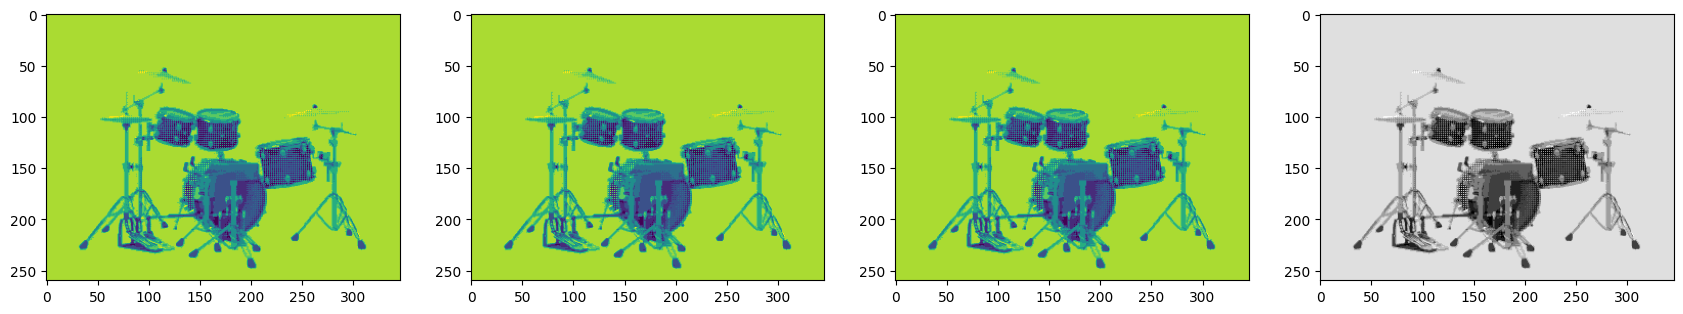

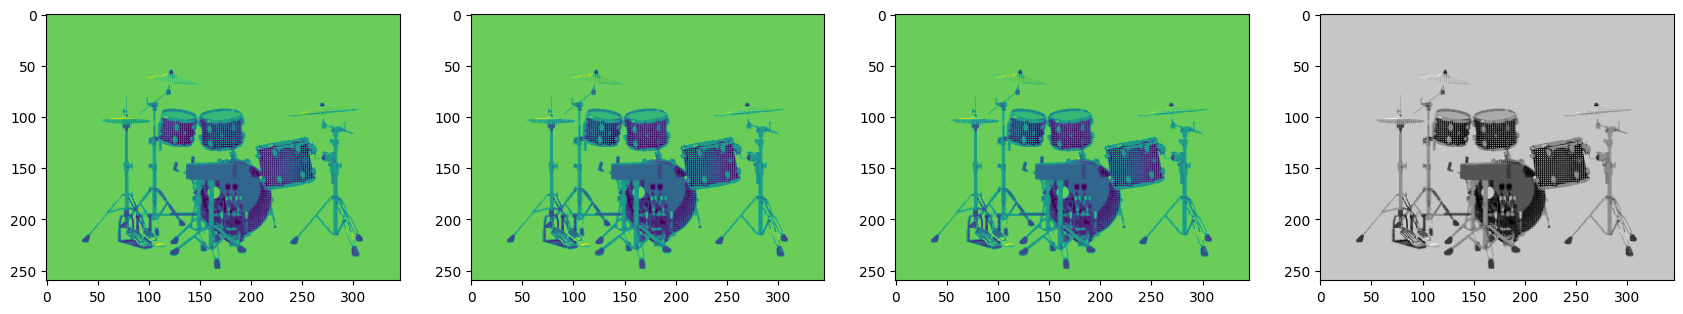

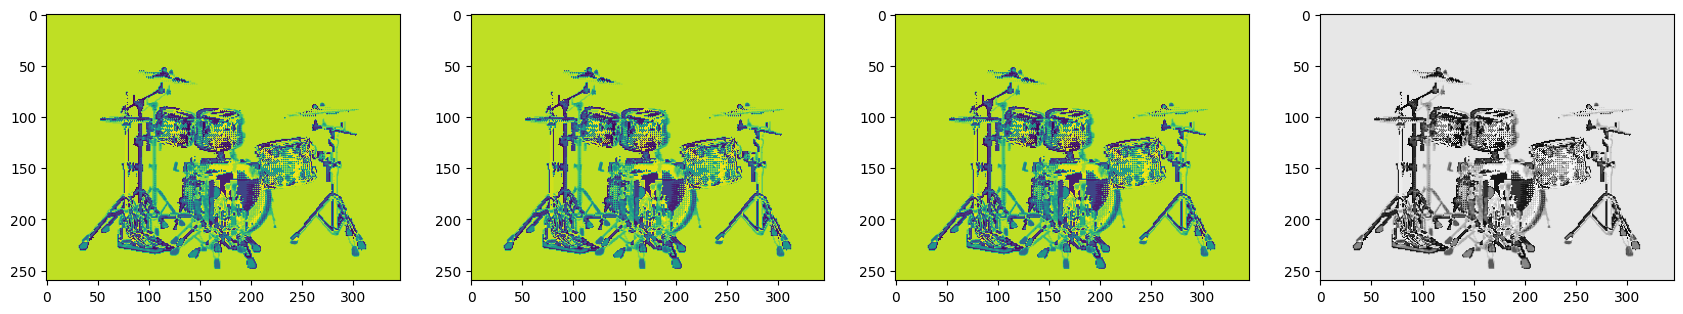

In [ ]:
eventData.ImgPlot(img_t0_gray)
eventData.ImgPlot(img_t_gray)
eventData.ImgPlot(img_t_gray-img_t0_gray)